<a href="https://colab.research.google.com/github/Laila4563/Machine-Learning-Project/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, QuantileTransformer


from scaling import scale_features
# from google.colab import drive

In [29]:
# drive.mount('/content/drive')

In [30]:
# file_path = "/content/drive/Shareddrives/ML Project/train.csv"

# Fady's Path
file_path = "G:/Shared drives/ML Project/train.csv"
df = pd.read_csv(file_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print unique values
for col, values in unique_values.items():
    print(f"{col}: {values}\n")

Id: [   1    2    3 ... 1458 1459 1460]

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea: [ 8450  9600 11250 ... 17217 13175  9717]

Street: ['Pave' 'Grvl']

Alley: [nan 'Grvl' 'Pave']

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities: ['AllPub' 'NoSeWa']

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR

In [33]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                     Feature Data Type
Id                        Id     int64
MSSubClass        MSSubClass     int64
MSZoning            MSZoning    object
LotFrontage      LotFrontage   float64
LotArea              LotArea     int64
Street                Street    object
Alley                  Alley    object
LotShape            LotShape    object
LandContour      LandContour    object
Utilities          Utilities    object
LotConfig          LotConfig    object
LandSlope          LandSlope    object
Neighborhood    Neighborhood    object
Condition1        Condition1    object
Condition2        Condition2    object
BldgType            BldgType    object
HouseStyle        HouseStyle    object
OverallQual      OverallQual     int64
OverallCond      OverallCond     int64
YearBuilt          YearBuilt     int64
YearRemodAdd    YearRemodAdd     int64
RoofStyle          RoofStyle    object
RoofMatl            RoofMatl    object
Exterior1st      Exterior1st    object
Exterior2nd      Exterior

In [34]:
#Checking the percentage of the missing data
pd.set_option('display.max_rows', None)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns, 'Missing Percentage': missing_percentage})
print(missing_df)

                     Feature  Missing Percentage
Id                        Id            0.000000
MSSubClass        MSSubClass            0.000000
MSZoning            MSZoning            0.000000
LotFrontage      LotFrontage           17.739726
LotArea              LotArea            0.000000
Street                Street            0.000000
Alley                  Alley           93.767123
LotShape            LotShape            0.000000
LandContour      LandContour            0.000000
Utilities          Utilities            0.000000
LotConfig          LotConfig            0.000000
LandSlope          LandSlope            0.000000
Neighborhood    Neighborhood            0.000000
Condition1        Condition1            0.000000
Condition2        Condition2            0.000000
BldgType            BldgType            0.000000
HouseStyle        HouseStyle            0.000000
OverallQual      OverallQual            0.000000
OverallCond      OverallCond            0.000000
YearBuilt          Y

In [35]:
#Checking the features values with missing values
features = ["LotFrontage", "Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]
pd.set_option('display.max_rows', None)
for feature in features:
    unique_values = df[feature].dropna().unique()  # Drop NaN values to see actual unique values
    print(f"{feature}: {unique_values}")

for feature in features:
    print(f"Feature: {feature}")
    print(df[feature].value_counts(dropna=False))  # Includes NaN in count
    print("\n" + "-"*50 + "\n")

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  72.  66. 101.
  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52. 100.
  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley: ['Grvl' 'Pave']
MasVnrType: ['BrkFace' 'Stone' 'BrkCmn']
FireplaceQu: ['TA' 'Gd' 'Fa' 'Ex' 'Po']
PoolQC: ['Ex' 'Fa' 'Gd']
Fence: ['MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature: ['Shed' 'Gar2' 'Othr' 'TenC']
MasVnrType: ['BrkFace' 'Stone' 'BrkCmn']
BsmtQual: ['Gd' 'TA' 'Ex' 'Fa']
BsmtCond: ['TA' 'Gd' 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
BsmtFinType2: ['Unf' 'BL

In [36]:
# Grouping the related features to handle data logically
def fix_logically_missing_values(df):
    df = df.copy()  # Avoid modifying the original data

    feature_groups = {
        "Garage": {
            "primary": "GarageType",
            "related_categorical": ["GarageFinish", "GarageQual", "GarageCond"],
            "related_numerical": ["GarageYrBlt", "GarageCars", "GarageArea"]
        },
        "Basement": {
            "primary": "BsmtQual",
            "related_categorical": ["BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"],
            "related_numerical": ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
        },
        "Masonry": {
            "primary": "MasVnrType",
            "related_categorical": [],
            "related_numerical": ["MasVnrArea"]
        },
        "Fireplace": {
            "primary": "Fireplaces",
            "related_categorical": ["FireplaceQu"],
            "related_numerical": []
        },
        "Pool": {
            "primary": "PoolArea",
            "related_categorical": ["PoolQC"],
            "related_numerical": []
        },
        "Fence": {
            "primary": "Fence",
            "related_categorical": [],
            "related_numerical": []
        },
        "Alley": {
            "primary": "Alley",
            "related_categorical": [],
            "related_numerical": []
        },
        "Miscellaneous": {
            "primary": "MiscFeature",
            "related_categorical": [],
            "related_numerical": ["MiscVal"]
        },
        "SecondFloor": {
            "primary": "2ndFlrSF",
            "related_categorical": [],
            "related_numerical": []
        }
    }

    for key, features in feature_groups.items():
        primary_col = features["primary"]
        categorical_cols = features["related_categorical"]
        numerical_cols = features["related_numerical"]

        # Ensure all columns exist to prevent KeyErrors
        if primary_col not in df.columns:
            continue

        # Create a mask for missing primary feature
        missing_mask = df[primary_col].isna()

        for col in categorical_cols:
            if col in df.columns:
                df.loc[missing_mask, col] = "Not Available"

        for col in numerical_cols:
            if col in df.columns:
                df.loc[missing_mask, col] = 0

    return df

df = fix_logically_missing_values(df)


In [85]:
def clean_missing_values(df):
    df = df.copy()

    # Handle categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        df.loc[:, col] = df[col].replace(["None", "NA", np.nan], "Not Available")

    # Handle numerical columns
    for col in df.select_dtypes(include=['number']).columns:
        missing_percentage = df[col].isna().mean() * 100  #missing values' percentages

        if missing_percentage > 50:
            print(f"Dropping column '{col}' due to {missing_percentage:.2f}% missing values.")
            df.drop(columns=[col], inplace=True)
        elif missing_percentage > 0:
            median_value = df[col].median()
            print(f"Filling missing values in '{col}' with median: {median_value}")
            df.loc[:, col] = df[col].fillna(median_value)

    return df

In [86]:
fix_df = fix_logically_missing_values(df)

In [89]:
cleaned_df=clean_missing_values(fix_df)
cleaned_df

,GrLivArea
0,469.268090
1,3010.121431
2,1316.745694
3,912.942554
4,169.624870
5,169.596292
6,59.838769
7,2011.230864
8,919.082154
9,1231.250062


In [40]:
def check_all_unique_values(df):
    unique_info = {}

    for col in df.columns:
        unique_info[col] = df[col].dropna().unique()  # Drop NaN for better readability

    return unique_info

unique_values_dict = check_all_unique_values(cleaned_df)

# Print unique values for each feature
for feature, values in unique_values_dict.items():
    print(f"Feature: {feature}")
    print(f"Unique Values ({len(values)}): {values}\n")
    print("-" * 50)



Feature: Id
Unique Values (1460): [   1    2    3 ... 1458 1459 1460]

--------------------------------------------------
Feature: MSSubClass
Unique Values (15): [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

--------------------------------------------------
Feature: MSZoning
Unique Values (5): ['RL' 'RM' 'C (all)' 'FV' 'RH']

--------------------------------------------------
Feature: LotFrontage
Unique Values (110): [ 65.  80.  68.  60.  84.  85.  75.  69.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

-

In [41]:
cleaned_df.duplicated().sum()

0

In [42]:
cleaned_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [43]:
#Saving the new data in a new file
# save_path = "/content/drive/Shareddrives/ML Project/preprocessed_data.csv"

# Fady's Path
save_path = "G:/Shared drives/ML Project/preprocessed_data.csv"

cleaned_df.to_csv(save_path, index=False)

print(f"Preprocessed data saved at: {save_path}")

Preprocessed data saved at: G:/Shared drives/ML Project/preprocessed_data.csv


Handling Outliers


In [44]:
# file_path = "/content/drive/Shareddrives/ML Project/preprocessed_data.csv"

# Fady's Path
file_path = "G:/Shared drives/ML Project/preprocessed_data.csv"
df = pd.read_csv(file_path)

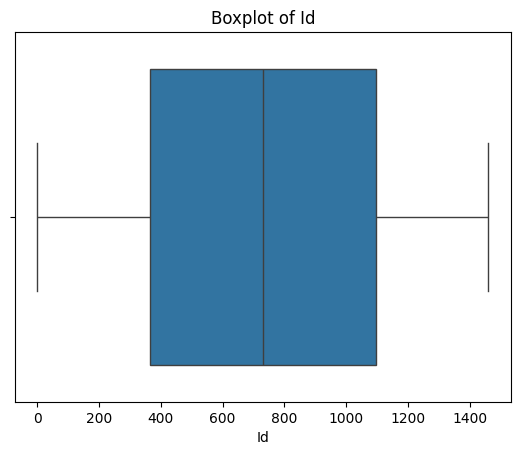

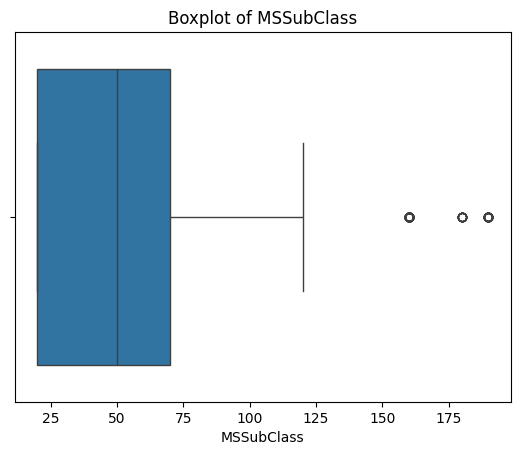

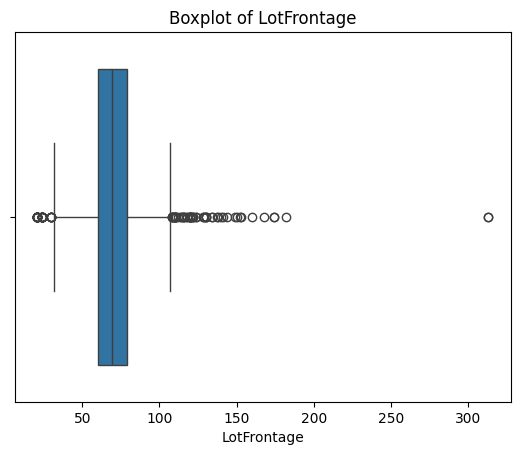

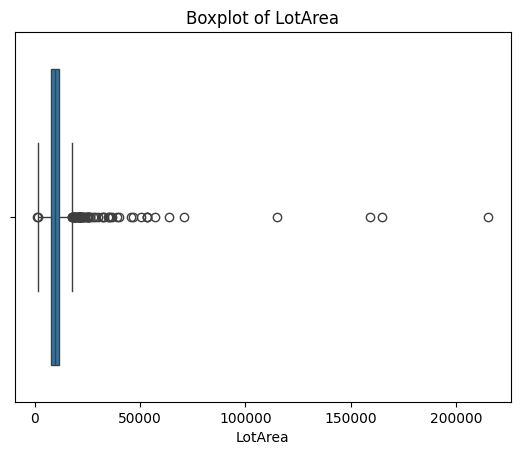

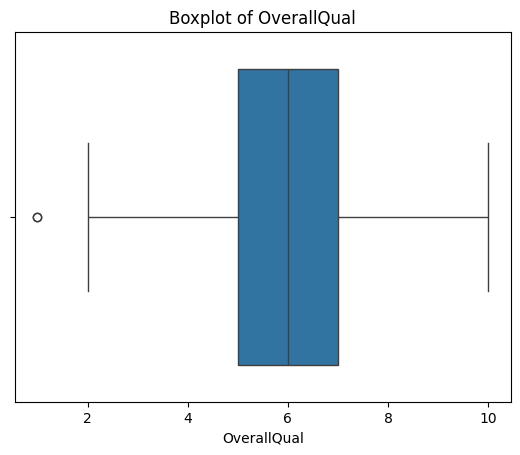

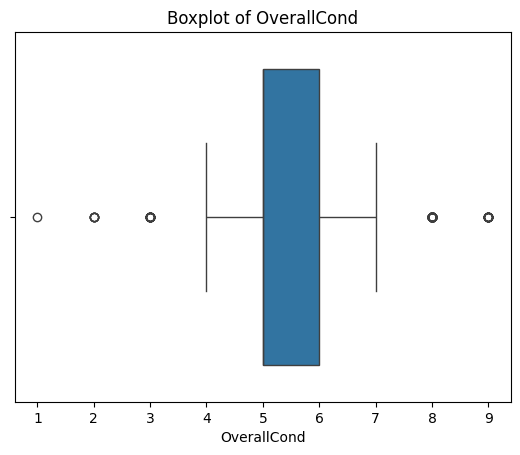

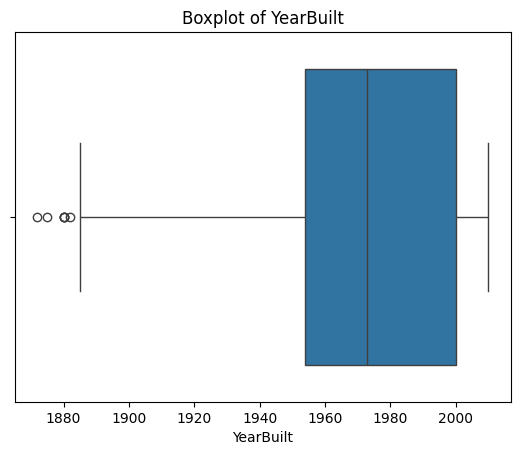

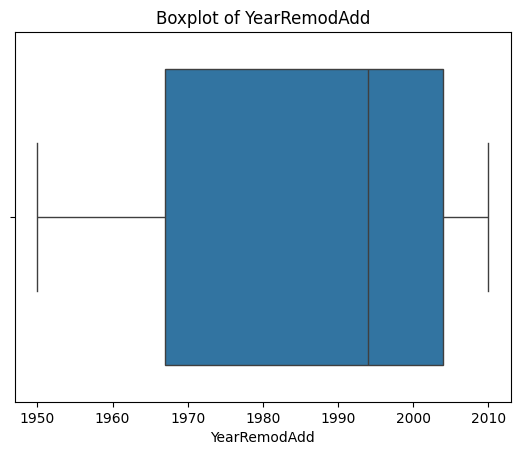

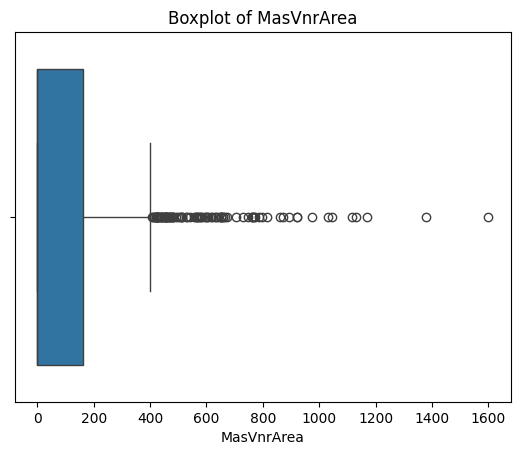

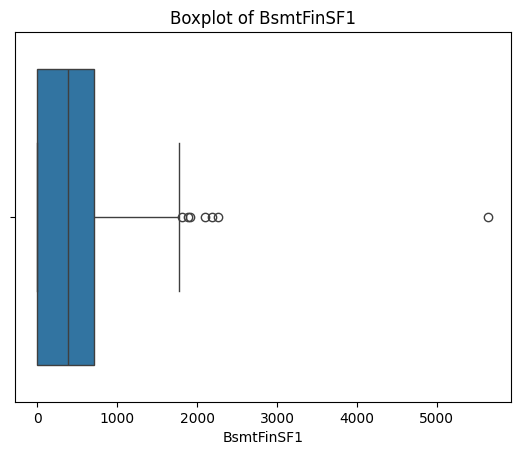

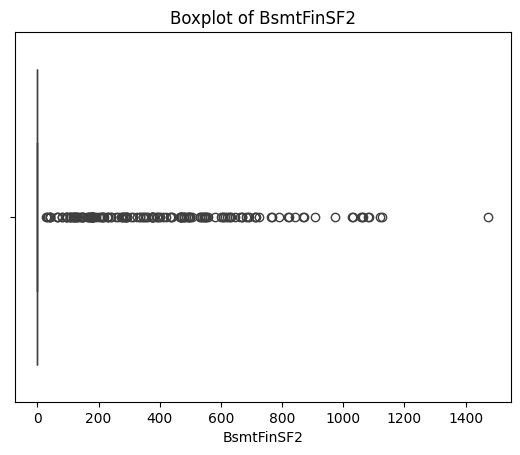

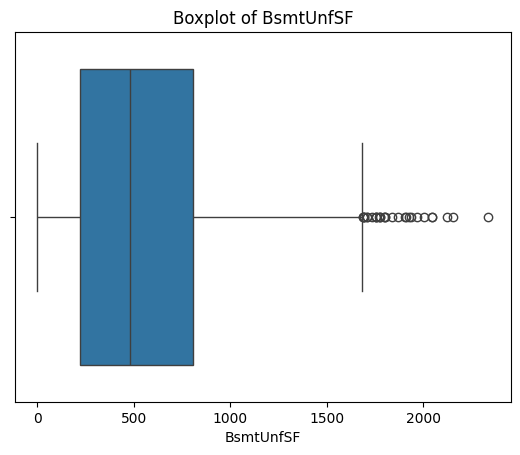

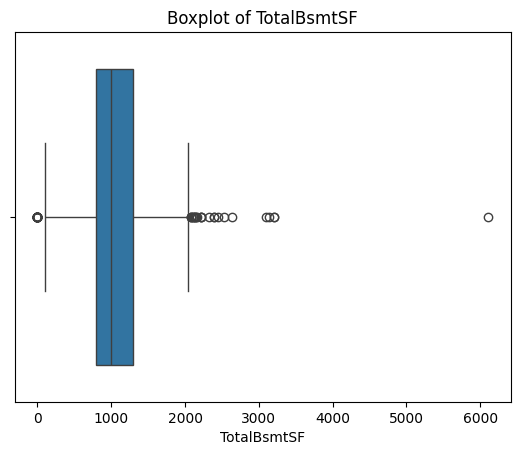

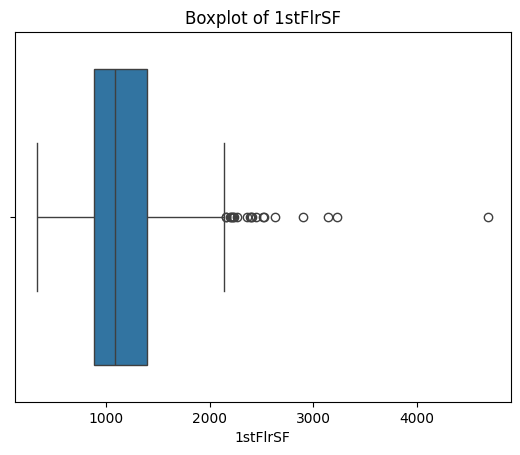

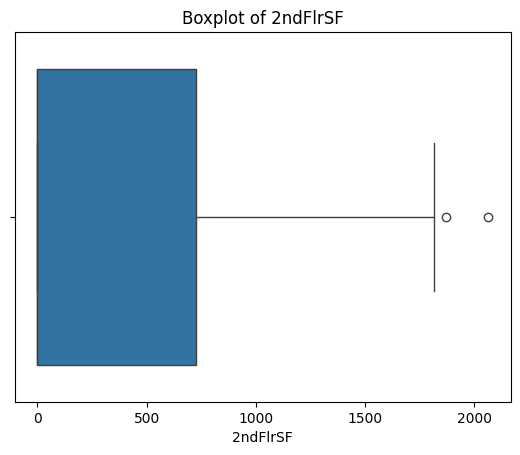

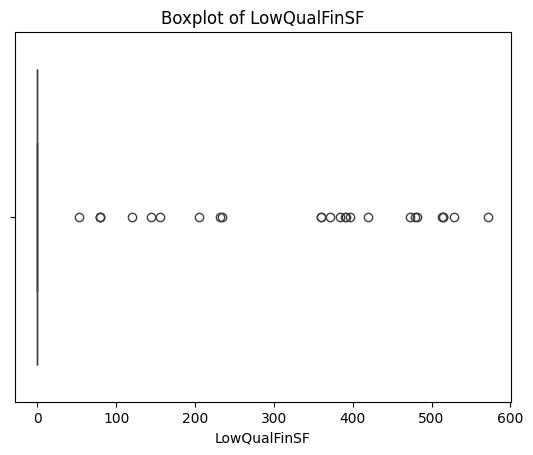

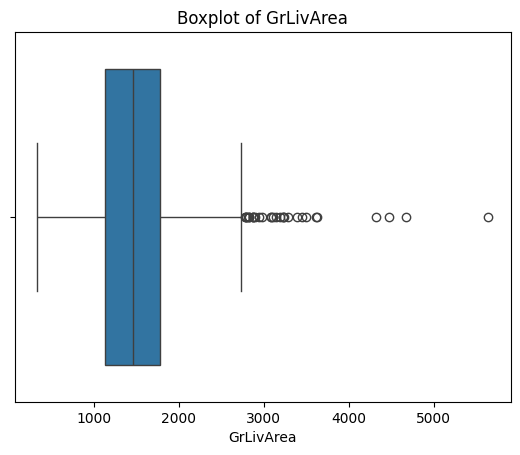

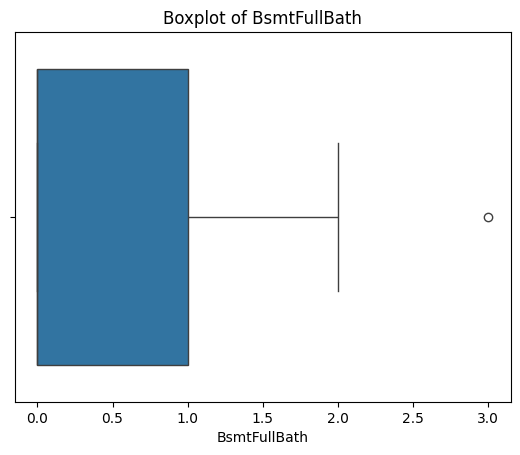

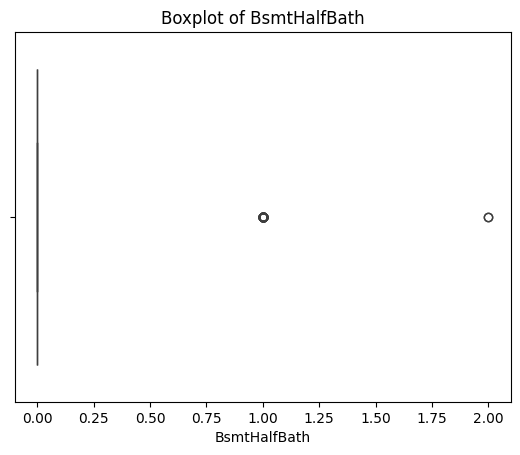

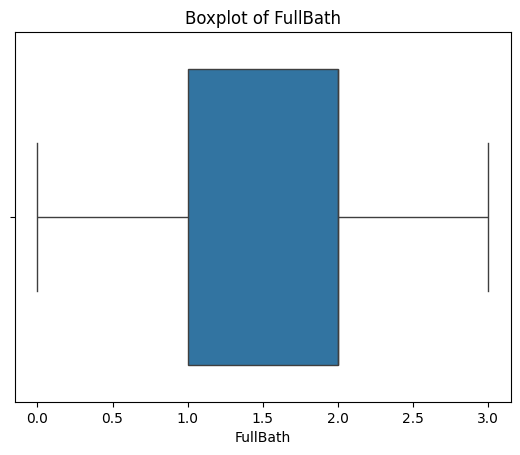

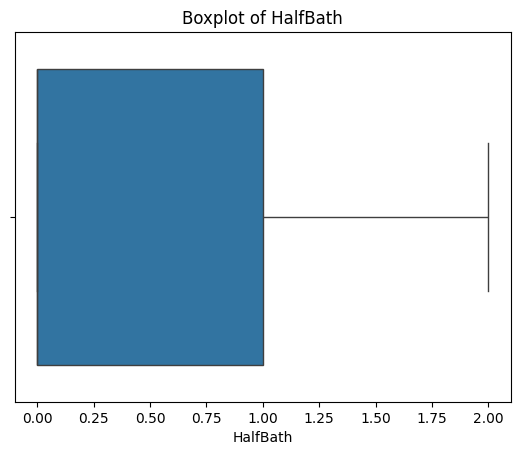

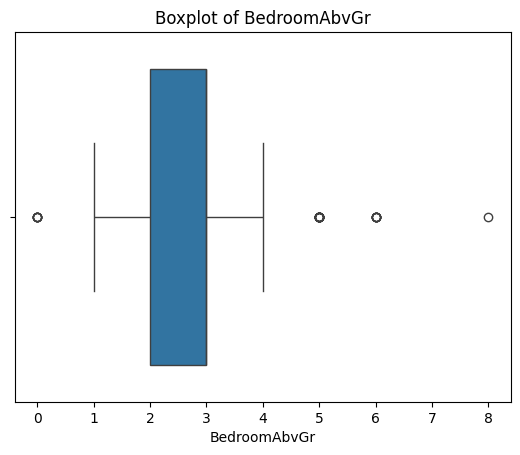

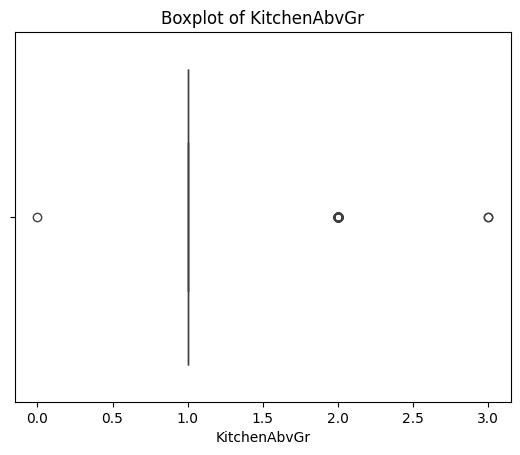

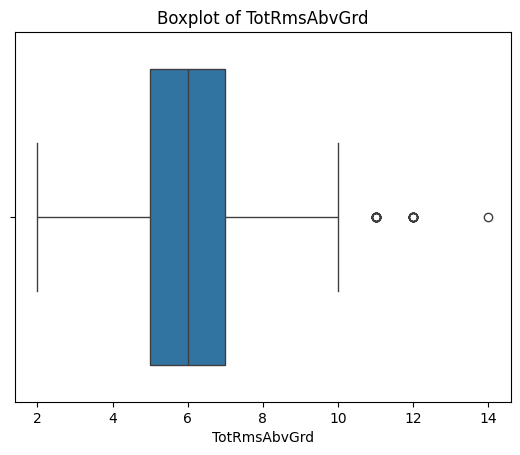

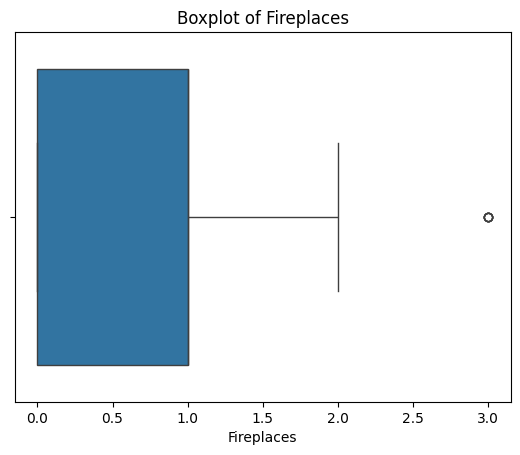

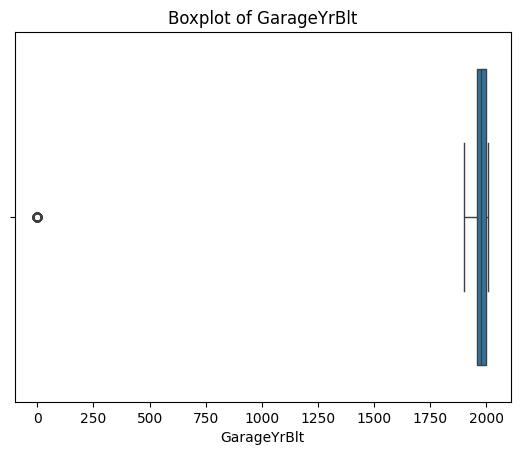

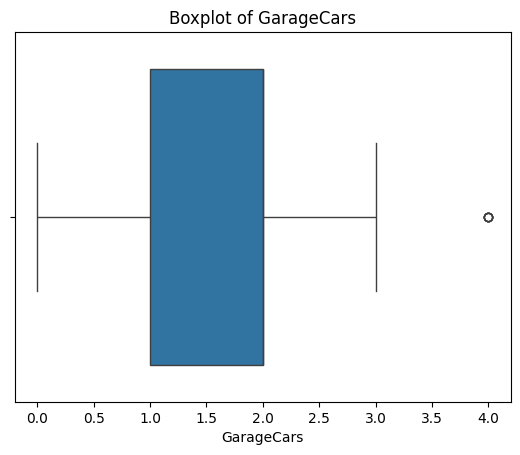

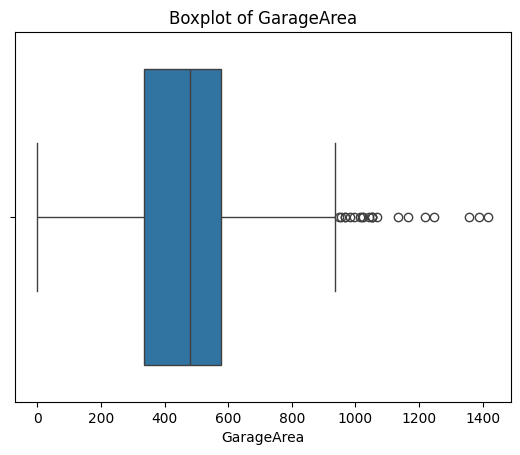

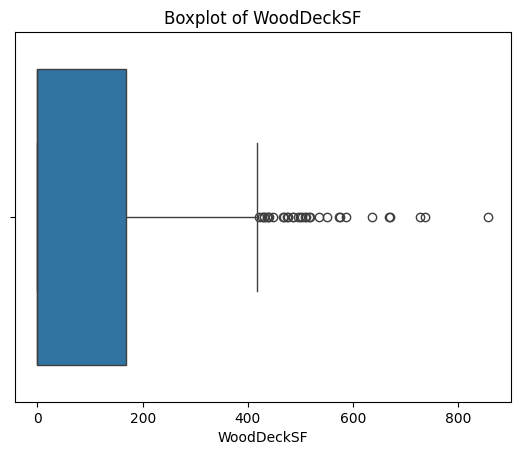

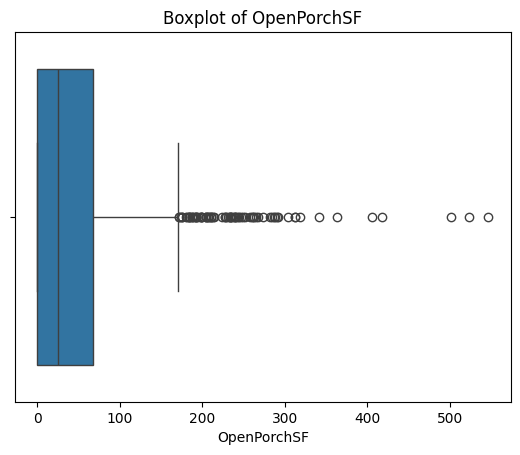

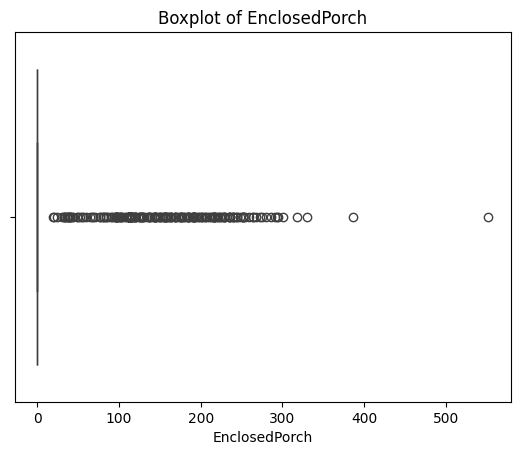

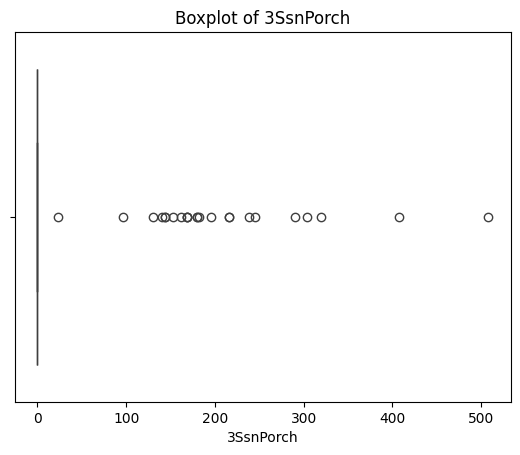

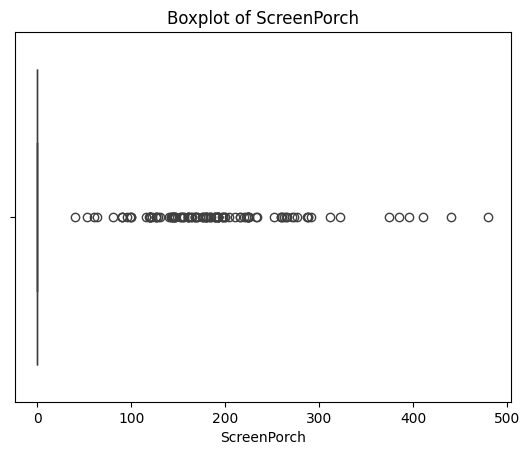

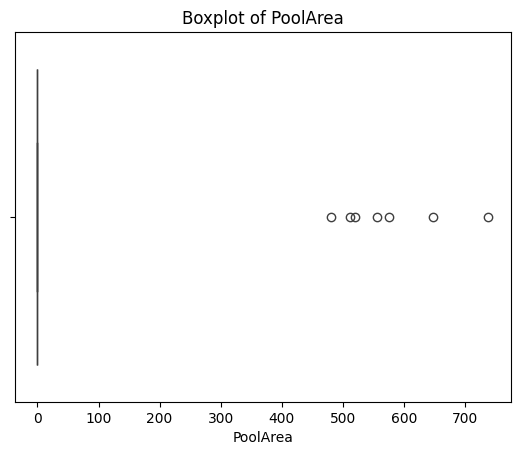

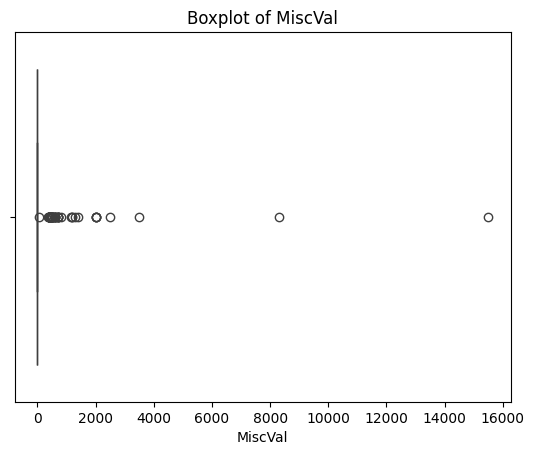

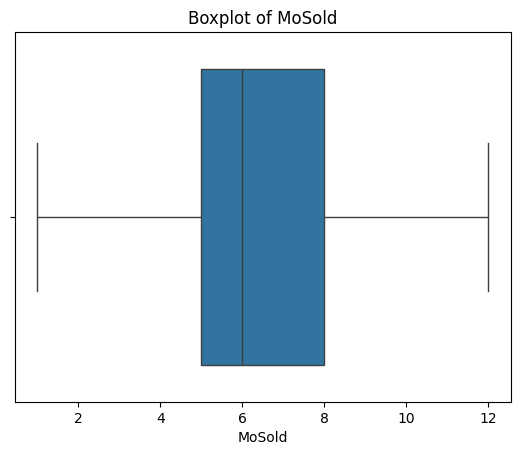

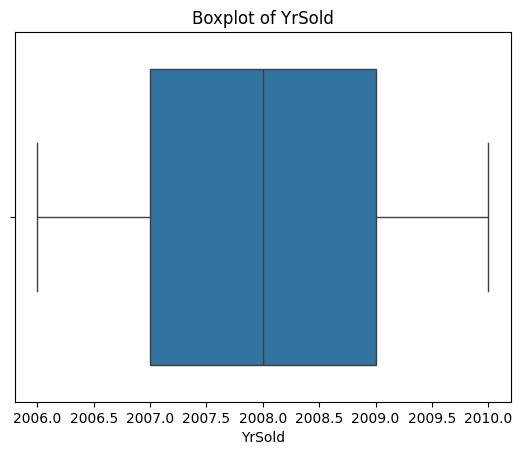

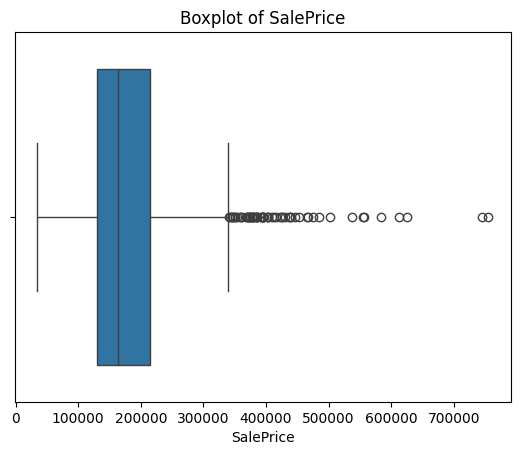

In [45]:
# Look for outliers:
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [46]:
max_value = df['SalePrice'].max()
min_value = df['SalePrice'].min()

print(f"Max value: {max_value}")
print(f"Min value: {min_value}")

Max value: 755000
Min value: 34900


In [47]:
# Function to handle outliers
def handle_outliers_iqr(df, column):
    """
    Handle outliers in a DataFrame column using the IQR method.
    - Caps outliers at the lower and upper bounds.
    """
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Cap outliers at the lower and upper bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

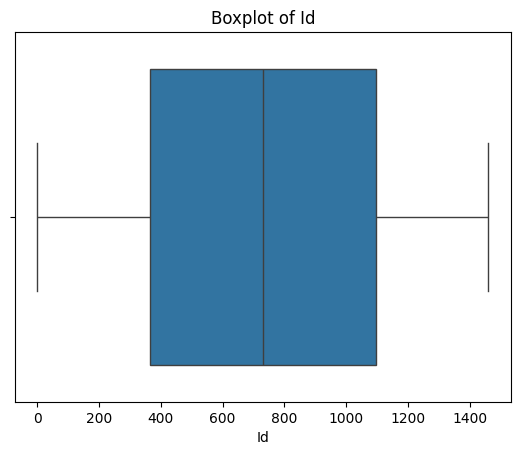

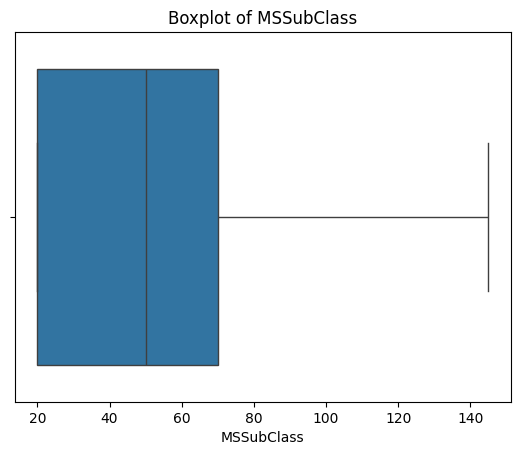

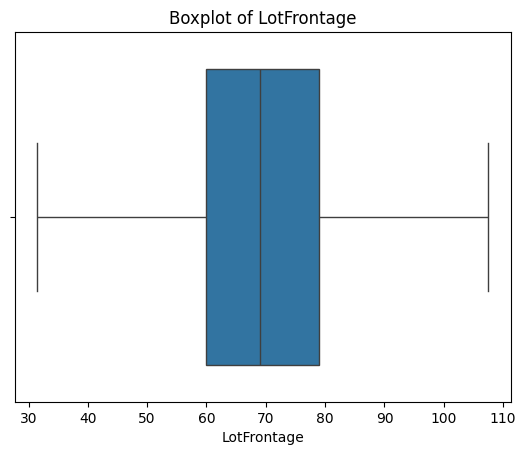

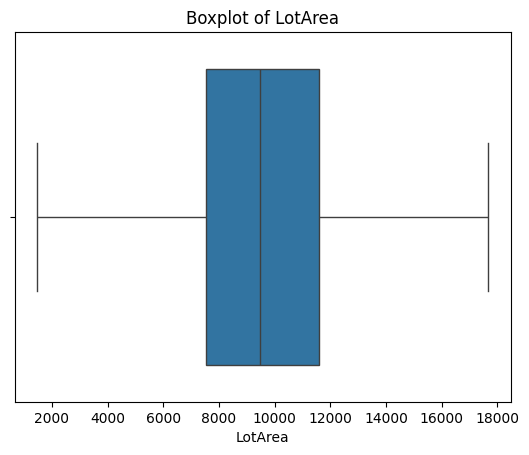

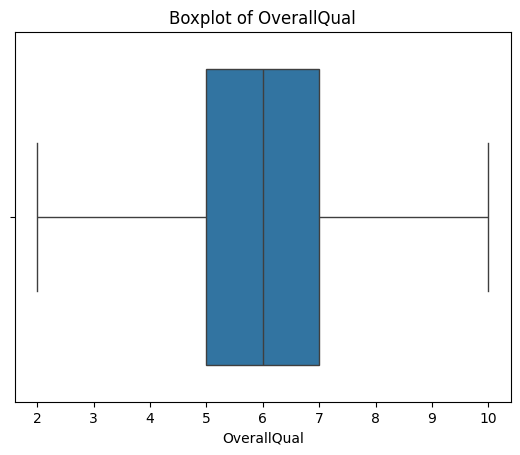

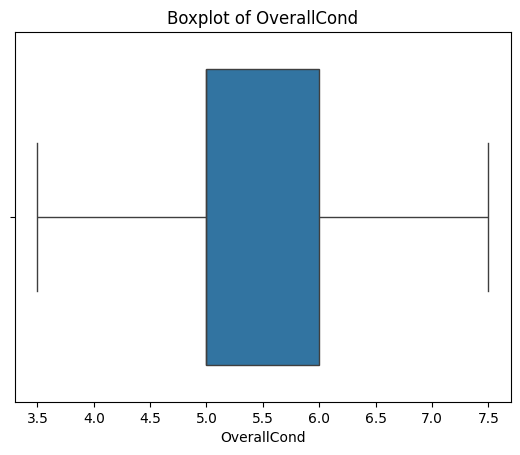

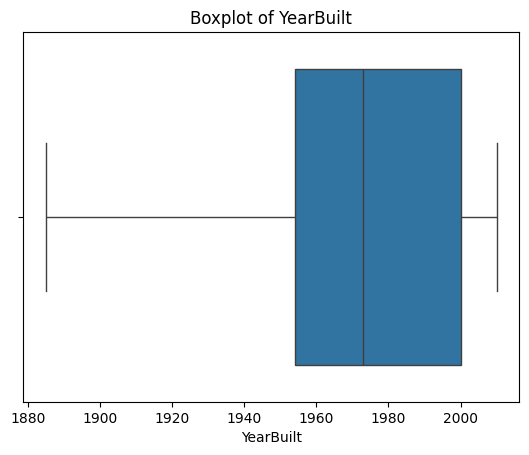

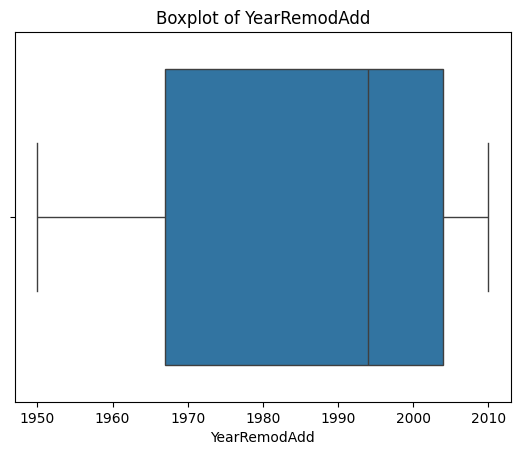

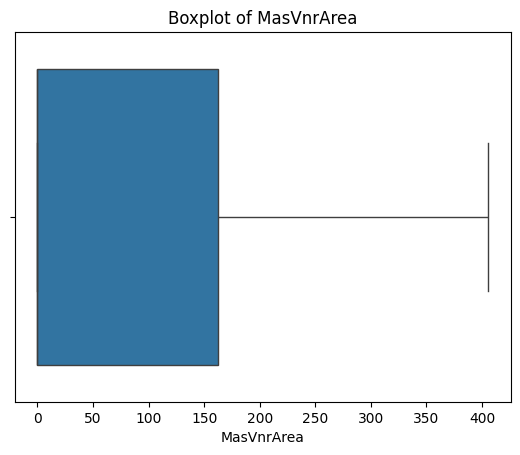

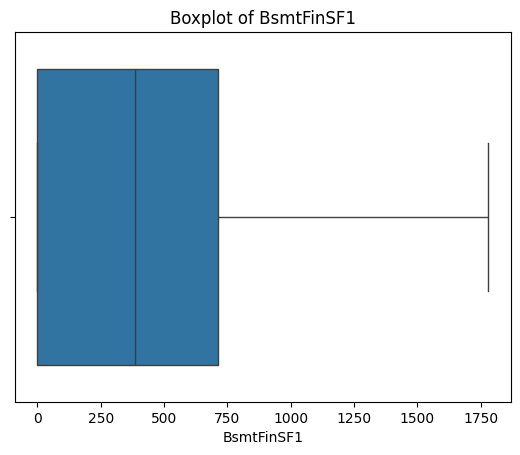

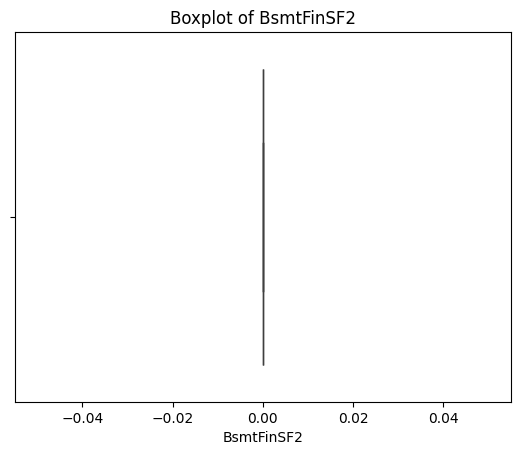

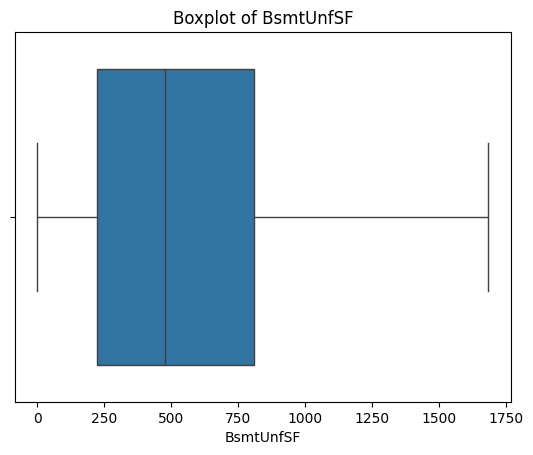

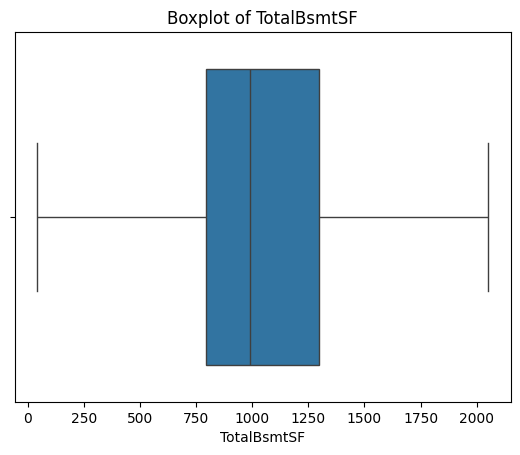

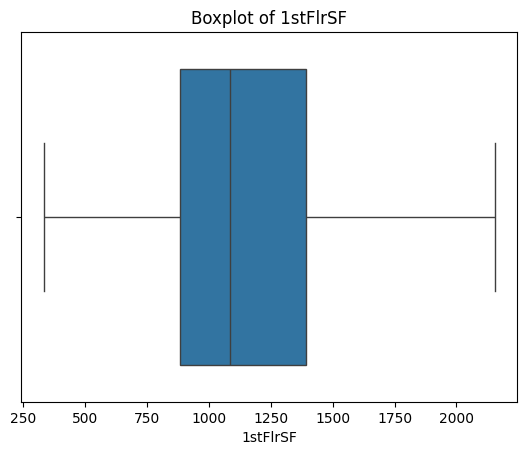

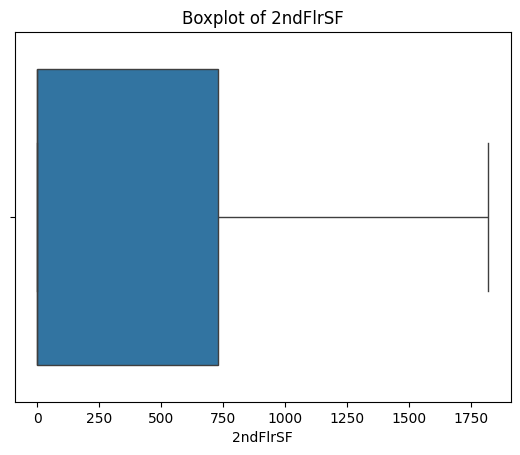

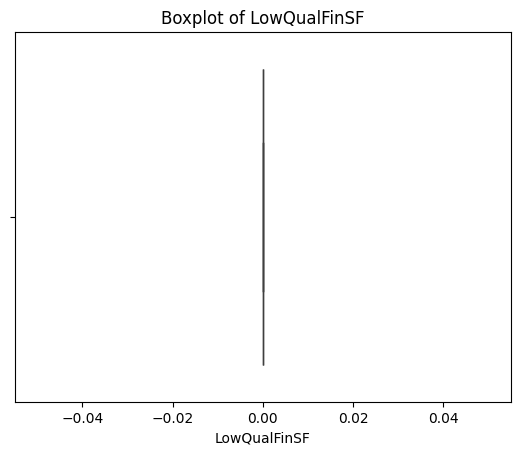

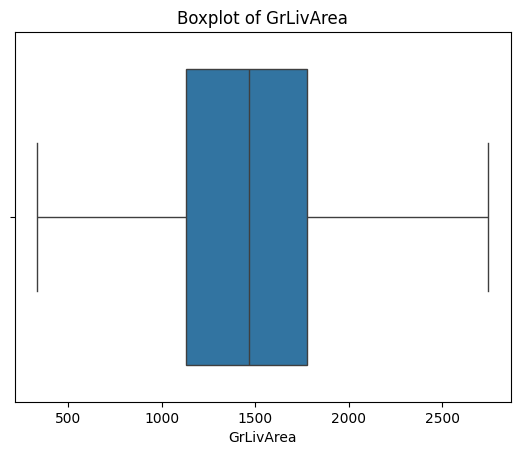

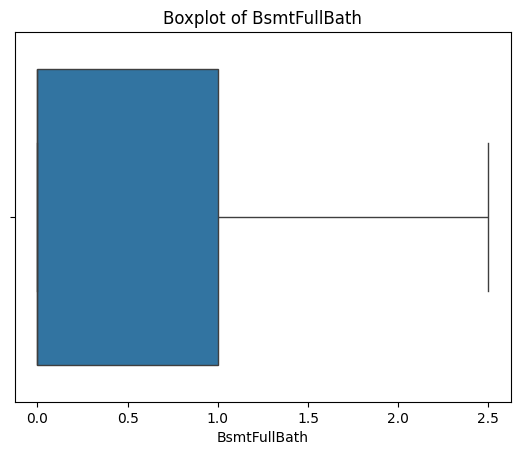

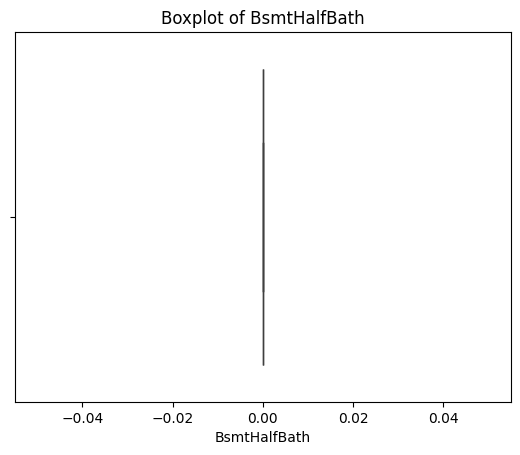

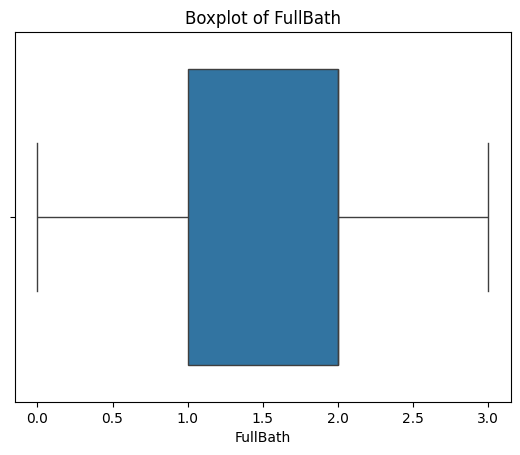

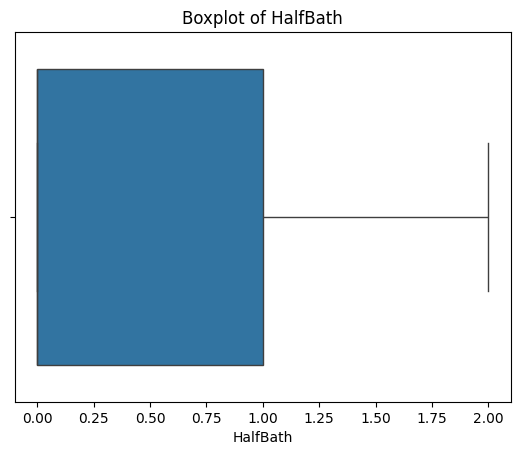

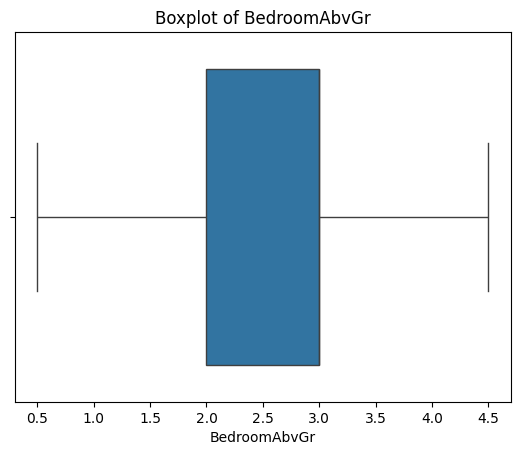

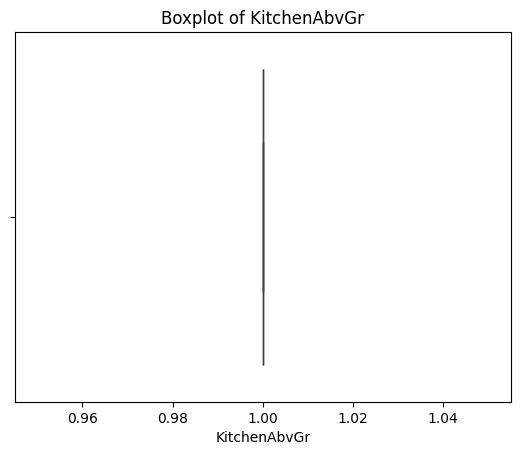

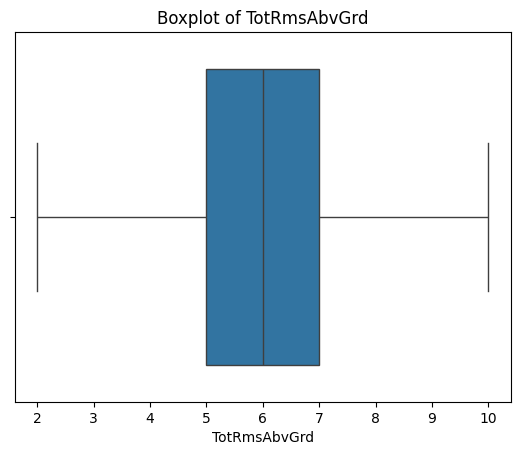

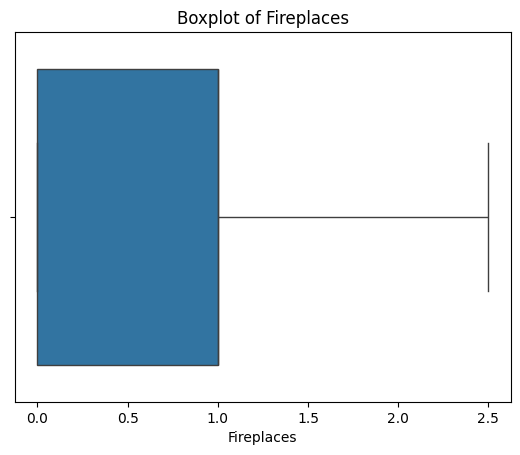

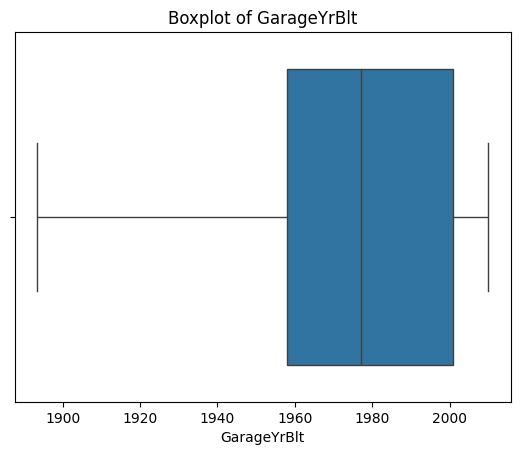

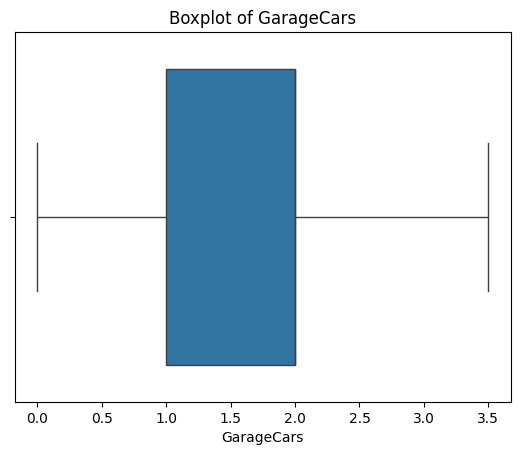

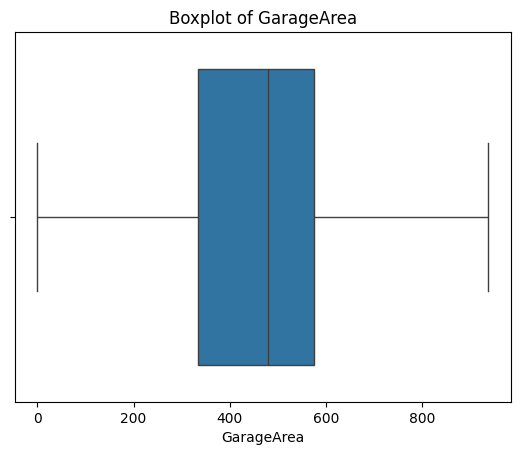

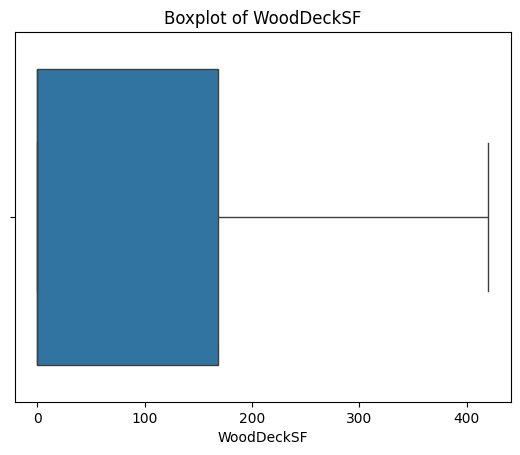

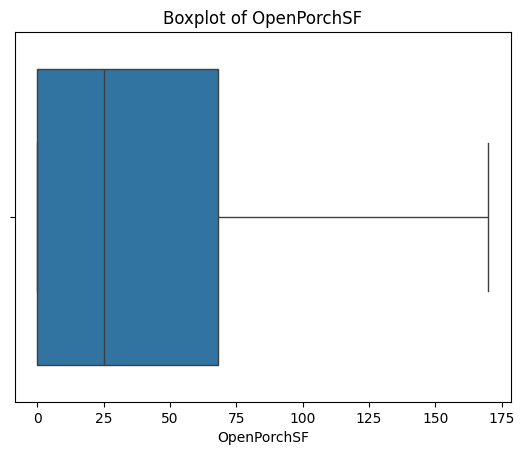

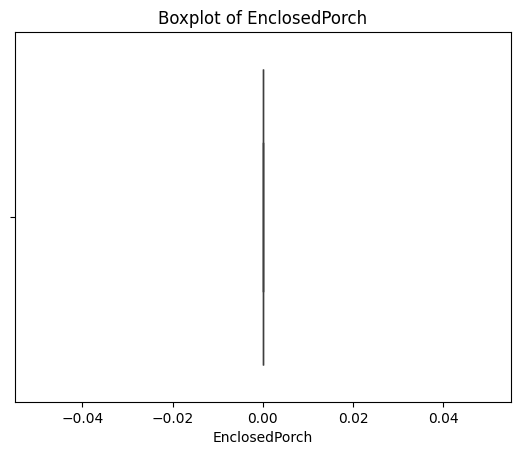

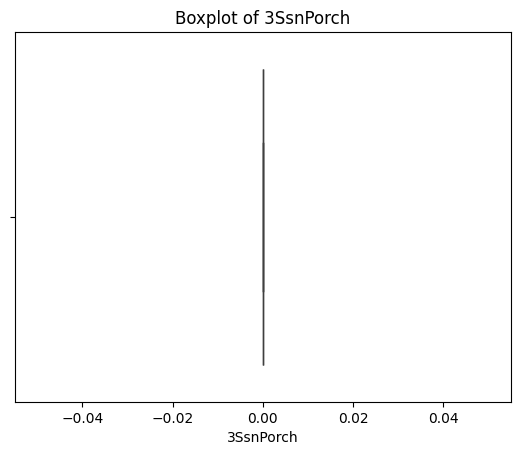

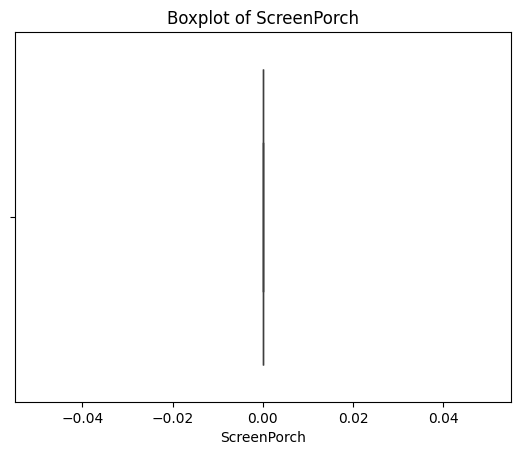

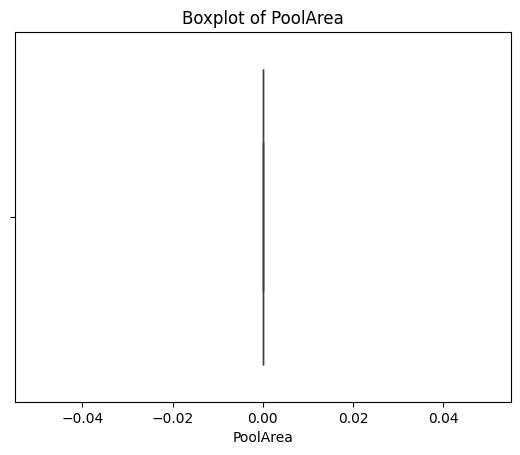

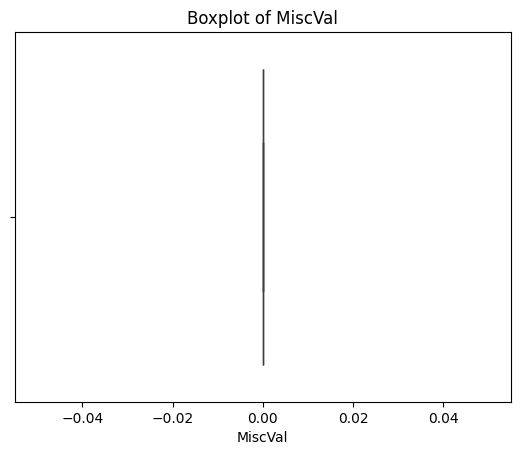

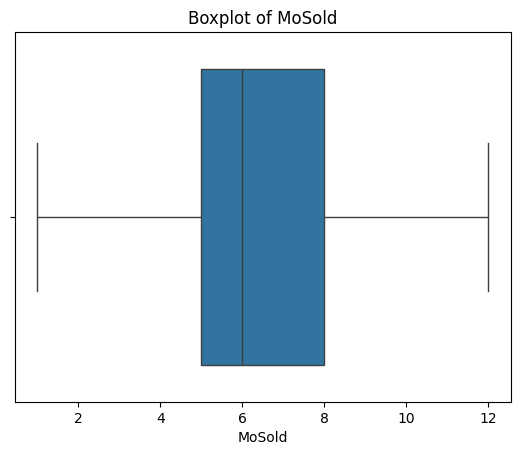

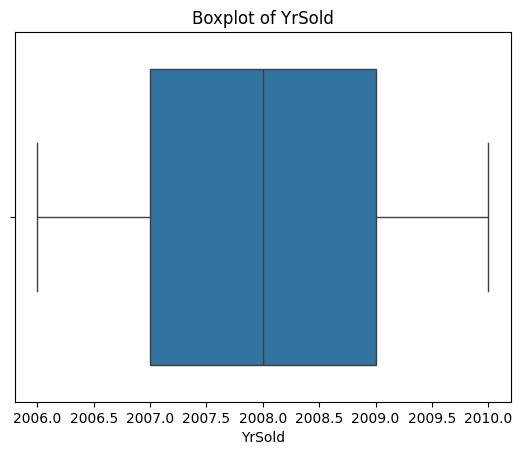

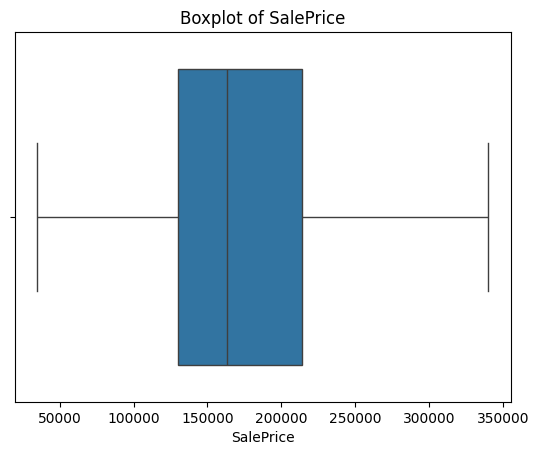

In [48]:
# List of numerical features (excluding the target variable 'SalePrice')
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# numerical_features.remove('SalePrice')

# Apply the function to handle outliers
new_df = handle_outliers_iqr(df, numerical_features)


for col in new_df.select_dtypes(include='number').columns:
  #not sure if target 'SalePrice' should be removed or not
    # if col != 'SalePrice':  # Skip the 'SalePrice' column
        sns.boxplot(x=new_df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

### Encoding

In [49]:
def label_encode_categorical_features(df):
    df = df.copy()

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    print(categorical_cols.tolist())
    print(len(categorical_cols.tolist()))
    

    # Apply Label Encoding to categorical features
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    return df, categorical_cols

In [50]:
# Load dataset
# df = pd.read_csv('/content/drive/Shareddrives/ML Project/preprocessed_data.csv')

# Fady's Path
df = pd.read_csv("G:/Shared drives/ML Project/preprocessed_data.csv")
encoded_df, categorical_features = label_encode_categorical_features(df)

# Save encoded dataset
# encoded_df.to_csv('/content/drive/Shareddrives/ML Project/encoded.csv', index=False)

# Fady's Path
encoded_df.to_csv("G:/Shared drives/ML Project/encoded.csv", index=False)
print("Encoded dataset saved successfully.")

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43
Encoded dataset saved successfully.


Scaling

In [51]:
# Load the dataset
# df = pd.read_csv('/content/drive/Shareddrives/ML Project/encoded.csv')

# Fady's Path
df = pd.read_csv("G:/Shared drives/ML Project/encoded.csv")

In [52]:
# Identify numerical features (excluding encoded categorical ones)
all_numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the target variable
all_numeric_features.remove('SalePrice')
all_numeric_features.remove('Id')

# Distinguish between truly numerical and encoded categorical features
numerical_features = [col for col in all_numeric_features if col not in categorical_features]

print("Categorical Features (Encoded):", categorical_features.to_list())
print("Number of Categorical Features: ", len(categorical_features))
print("Numerical Features:", numerical_features)
print("Number of Numerical Features: ", len(numerical_features))

Categorical Features (Encoded): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Number of Categorical Features:  43
Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fire

In [53]:
scaled_df = scale_features(encoded_df, numerical_features)


print("Before Scaling:\n", encoded_df.describe())
print("\nAfter Scaling:\n", scaled_df.describe())


# Save the scaled dataset
# scaled_df.to_csv('/content/drive/Shareddrives/ML Project/scaled.csv', index=False)

# # Fady's Path
scaled_df.to_csv("G:/Shared drives/ML Project/scaled.csv", index=False)
print("Scaled dataset saved successfully.")

Before Scaling:
                 Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean    730.500000    56.897260     3.028767    69.863699   10516.828082   
std     421.610009    42.300571     0.632017    22.027677    9981.264932   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     365.750000    20.000000     3.000000    60.000000    7553.500000   
50%     730.500000    50.000000     3.000000    69.000000    9478.500000   
75%    1095.250000    70.000000     3.000000    79.000000   11601.500000   
max    1460.000000   190.000000     4.000000   313.000000  215245.000000   

            Street        Alley     LotShape  LandContour    Utilities  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.995890     0.993836     1.942466     2.777397     0.000685  ...   
std       0.063996     0.249667     1.409156     0.707666    

### Skewness Treatment

In [ ]:
df_encoded = pd.read_csv("G:/Shared drives/ML Project/encoded.csv")

numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['SalePrice', 'Id']]
encoded_categorical_features = [col for col in numerical_features if df_encoded[col].nunique() <= 10]
continuous_features = [col for col in numerical_features if col not in encoded_categorical_features]

print(f"Encoded Categorical Features (Excluded): {encoded_categorical_features}")
print(f"Continuous Numerical Features (Treated): {continuous_features}")

🔵 Encoded Categorical Features (Excluded): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'YrSold', 'SaleType', 'SaleCondition']
🟢 Continuous Numerical Features (Treated): ['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'L

Found 24 skewed continuous features: ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
MSSubClass transformed using Log(1 + x)
LotFrontage transformed using Yeo-Johnson
LotArea transformed using Quantile Transformation
YearBuilt is negatively skewed. Data reflected.
YearBuilt transformed using Square Root
YearRemodAdd is negatively skewed. Data reflected.
YearRemodAdd transformed using Square Root
Exterior1st is negatively skewed. Data reflected.
Exterior1st transformed using Square Root
Exterior2nd is negatively skewed. Data reflected.
Exterior2nd transformed using Square Root
MasVnrArea transformed using Yeo-Johnson
BsmtFinSF1 transformed using Log(1 + x)
BsmtFinSF2 transformed using Yeo-Johnson
Bsmt

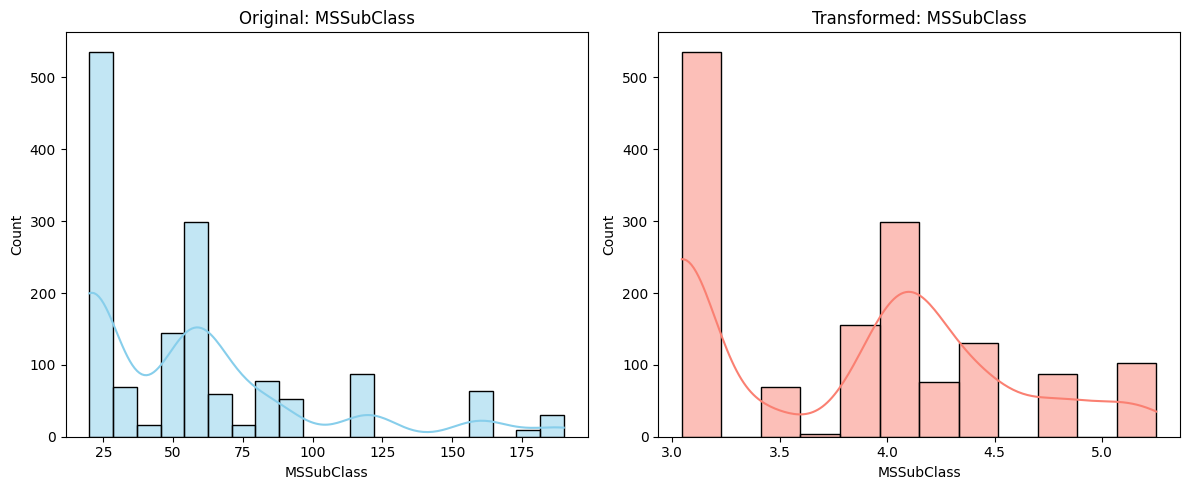

----------------------------------------
Feature: LotFrontage
  Original Skewness: 2.41
  Transformed Skewness: 0.17
----------------------------------------


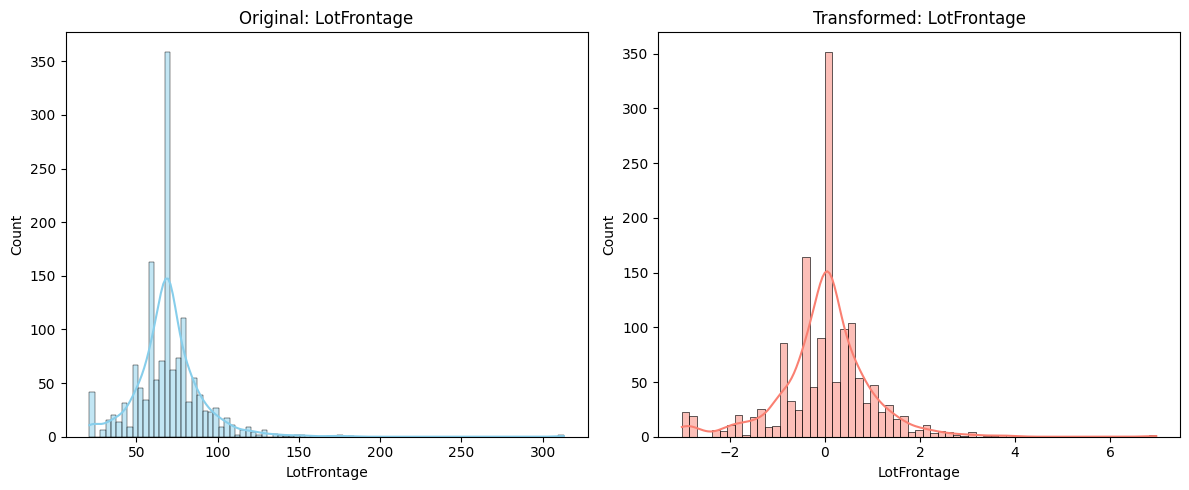

----------------------------------------
Feature: LotArea
  Original Skewness: 12.20
  Transformed Skewness: 0.00
----------------------------------------


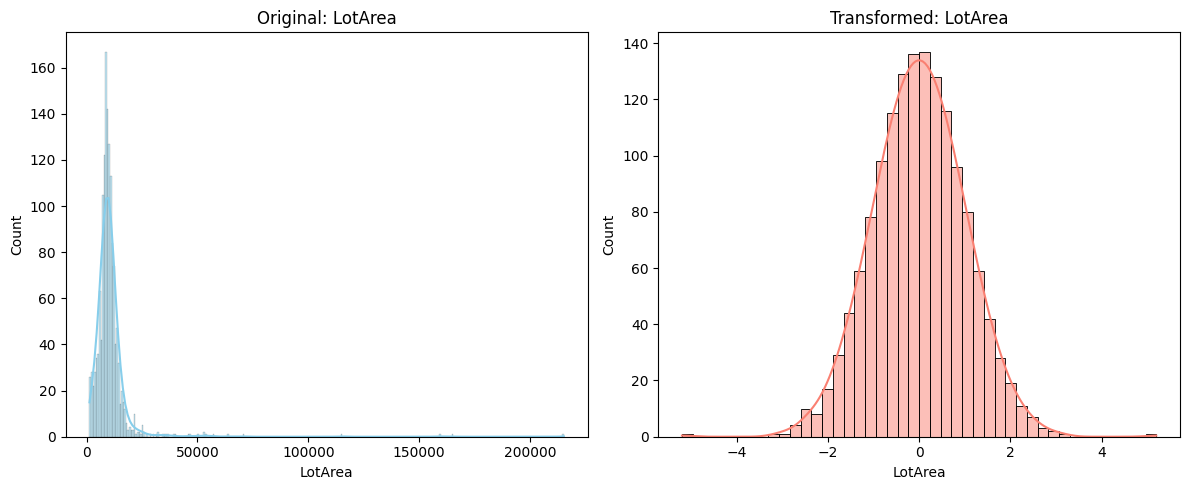

----------------------------------------
Feature: YearBuilt
  Original Skewness: -0.61
  Transformed Skewness: 0.01
----------------------------------------


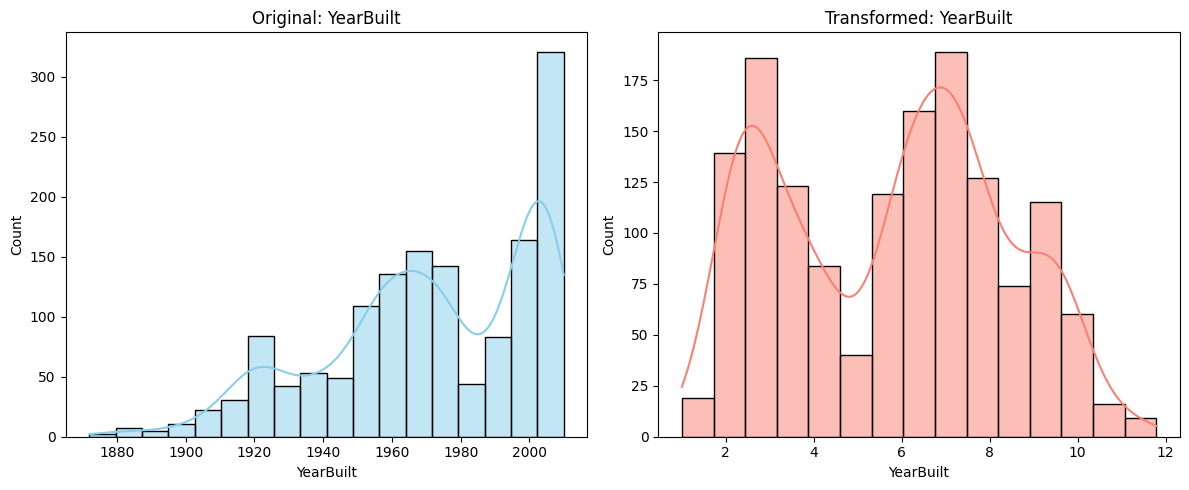

----------------------------------------
Feature: YearRemodAdd
  Original Skewness: -0.50
  Transformed Skewness: 0.18
----------------------------------------


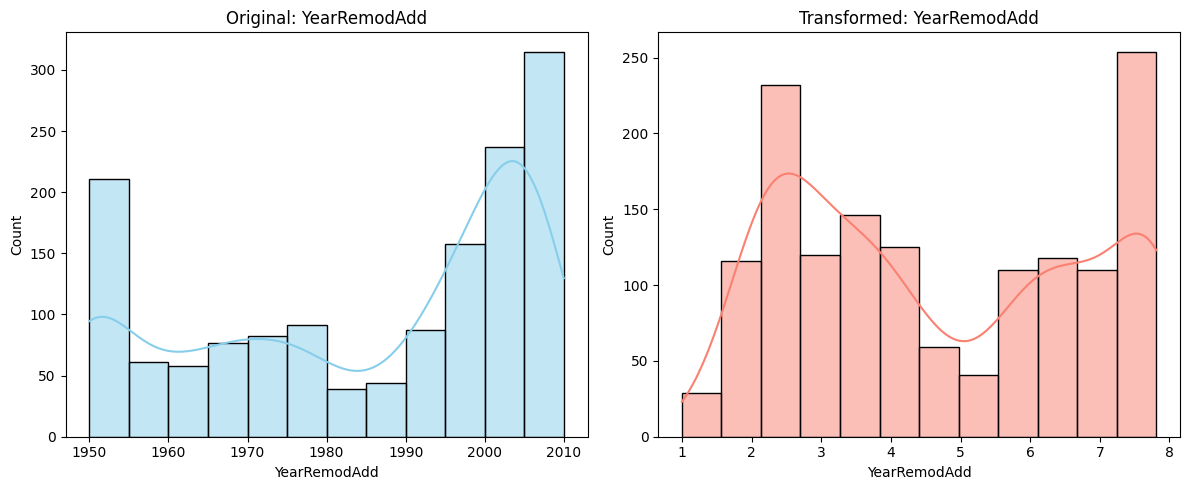

----------------------------------------
Feature: Exterior1st
  Original Skewness: -0.73
  Transformed Skewness: 0.36
----------------------------------------


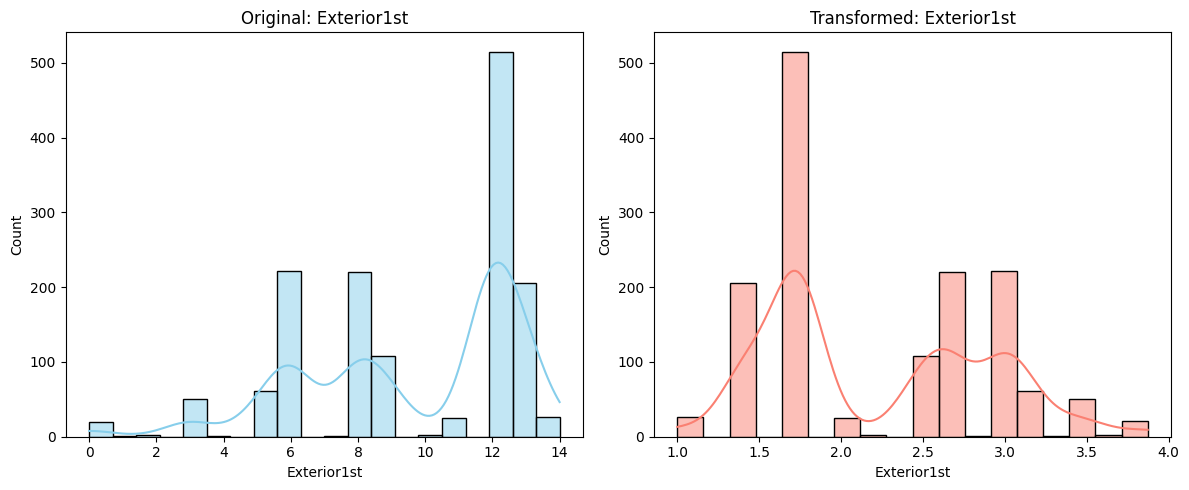

----------------------------------------
Feature: Exterior2nd
  Original Skewness: -0.69
  Transformed Skewness: 0.34
----------------------------------------


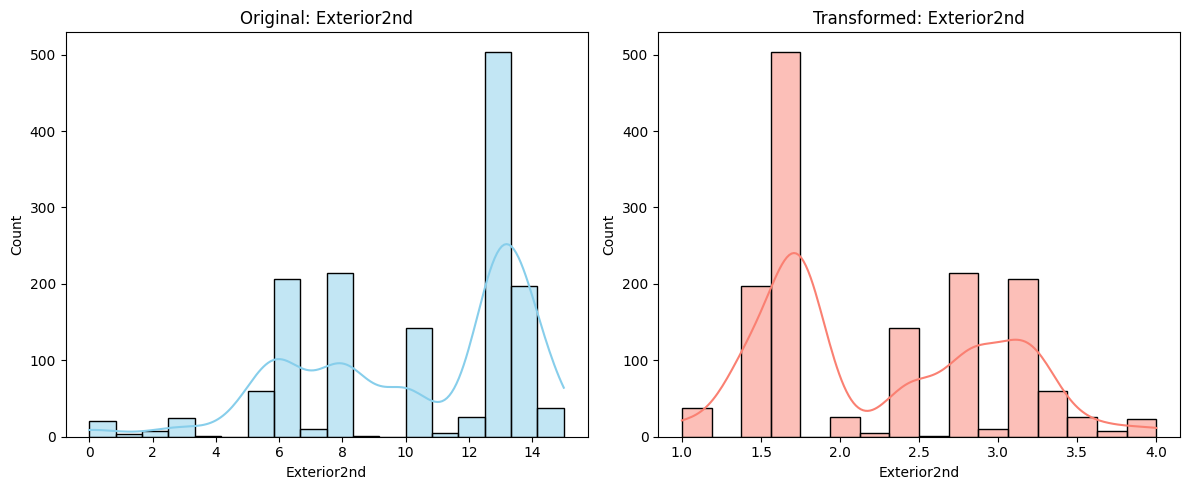

----------------------------------------
Feature: MasVnrArea
  Original Skewness: 2.69
  Transformed Skewness: 0.43
----------------------------------------


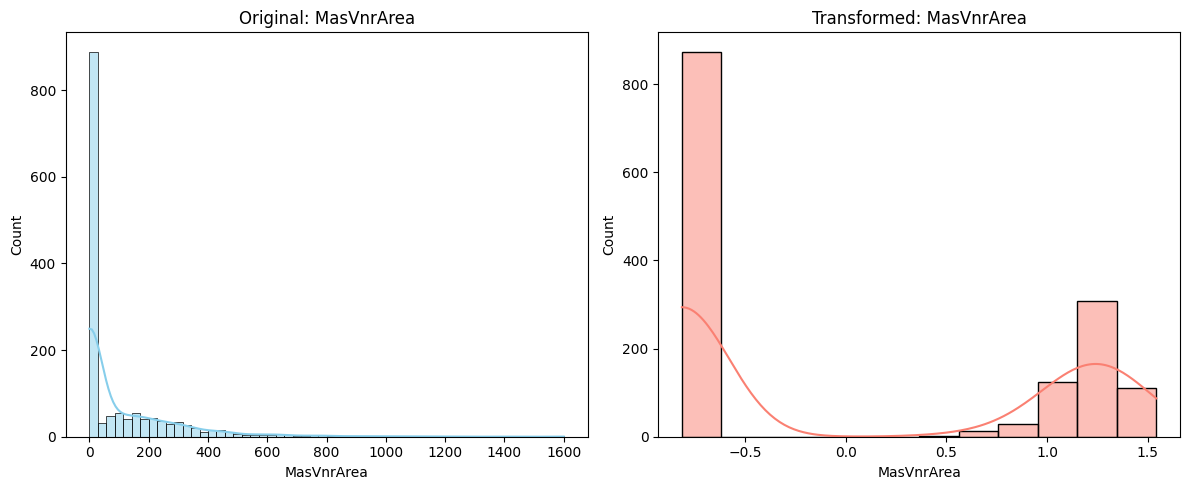

----------------------------------------
Feature: BsmtFinSF1
  Original Skewness: 1.68
  Transformed Skewness: -0.62
----------------------------------------


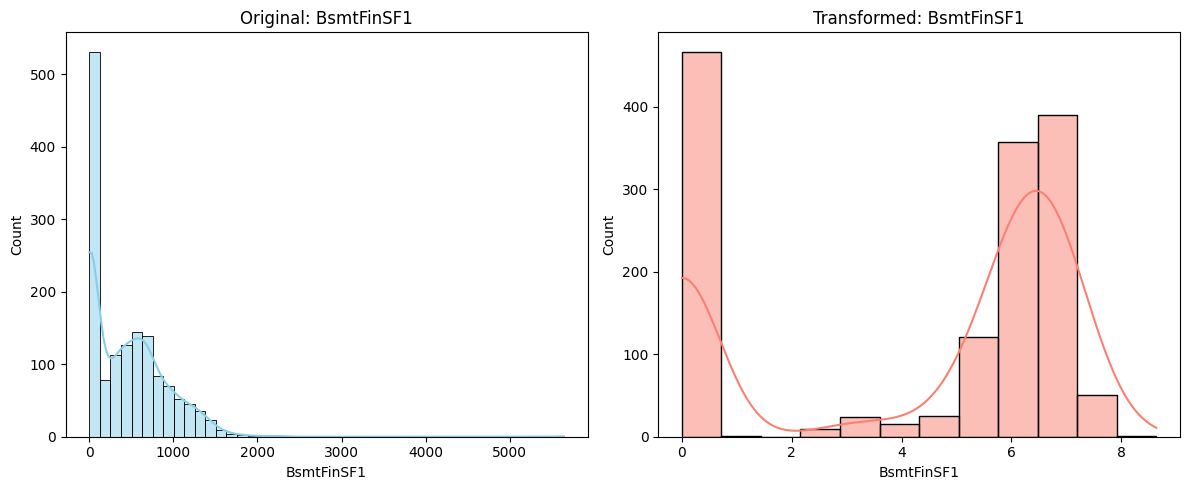

----------------------------------------
Feature: BsmtFinSF2
  Original Skewness: 4.25
  Transformed Skewness: 2.42
----------------------------------------


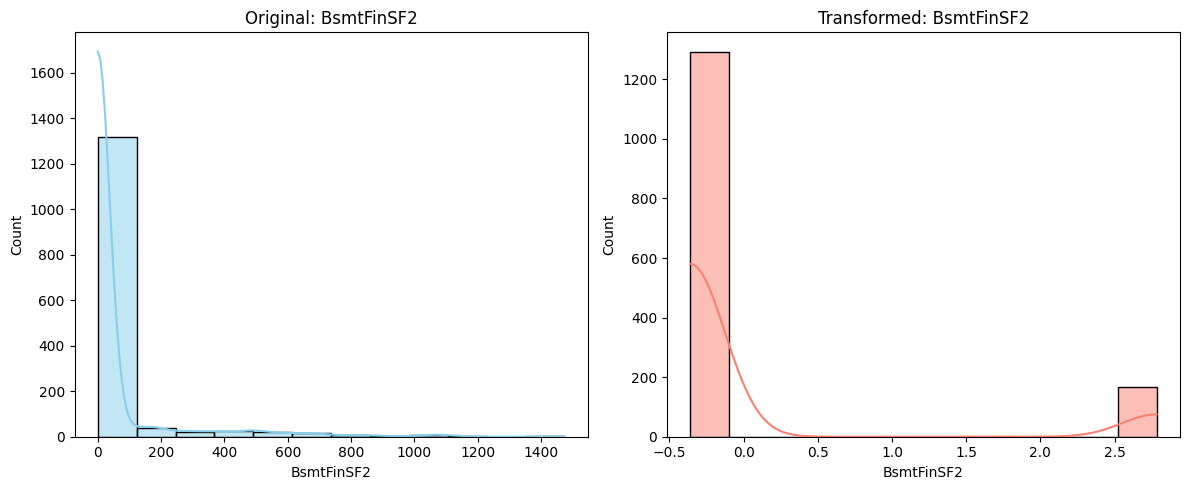

----------------------------------------
Feature: BsmtUnfSF
  Original Skewness: 0.92
  Transformed Skewness: -0.25
----------------------------------------


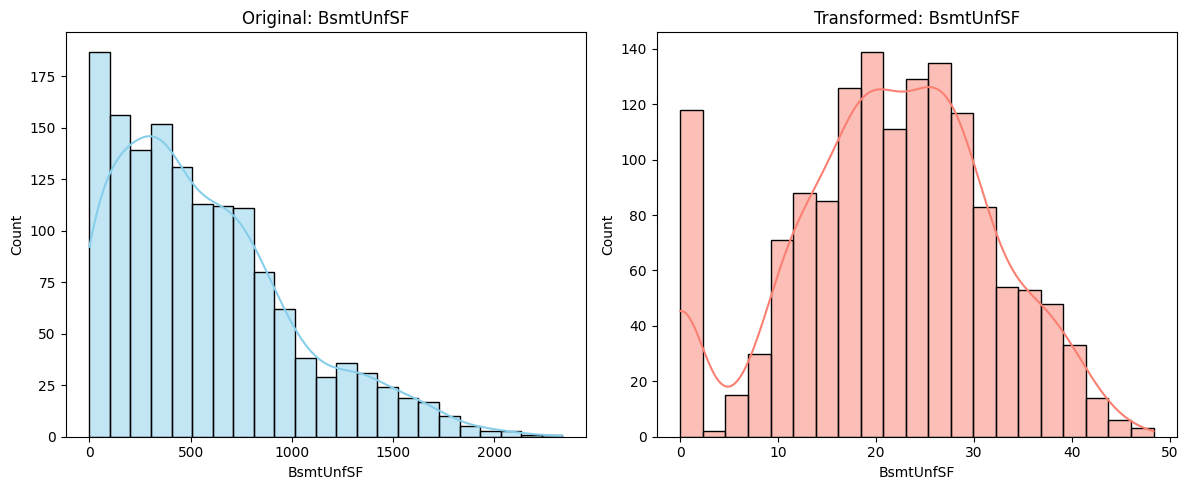

----------------------------------------
Feature: TotalBsmtSF
  Original Skewness: 1.52
  Transformed Skewness: 1.52
----------------------------------------


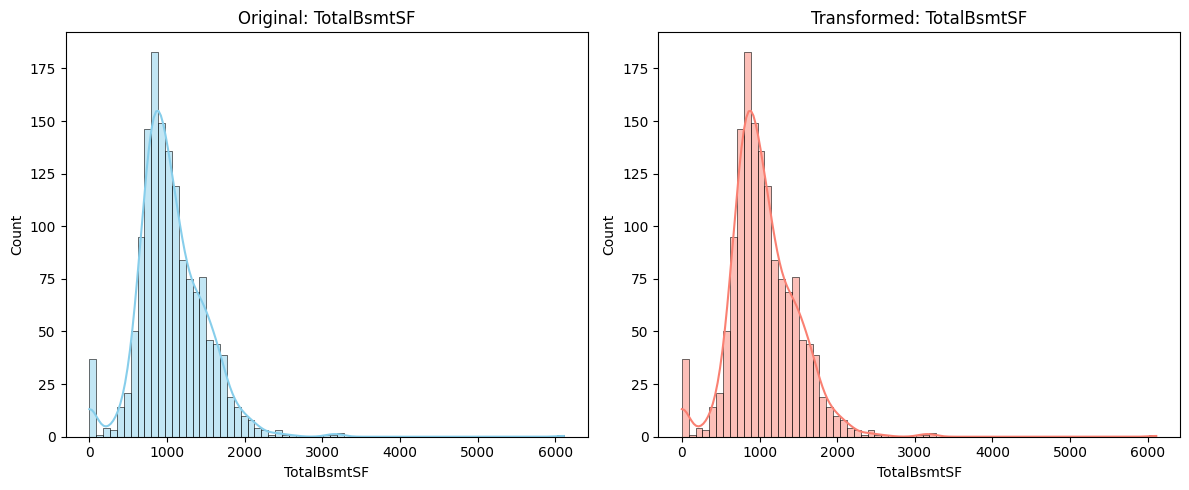

----------------------------------------
Feature: 1stFlrSF
  Original Skewness: 1.38
  Transformed Skewness: 0.08
----------------------------------------


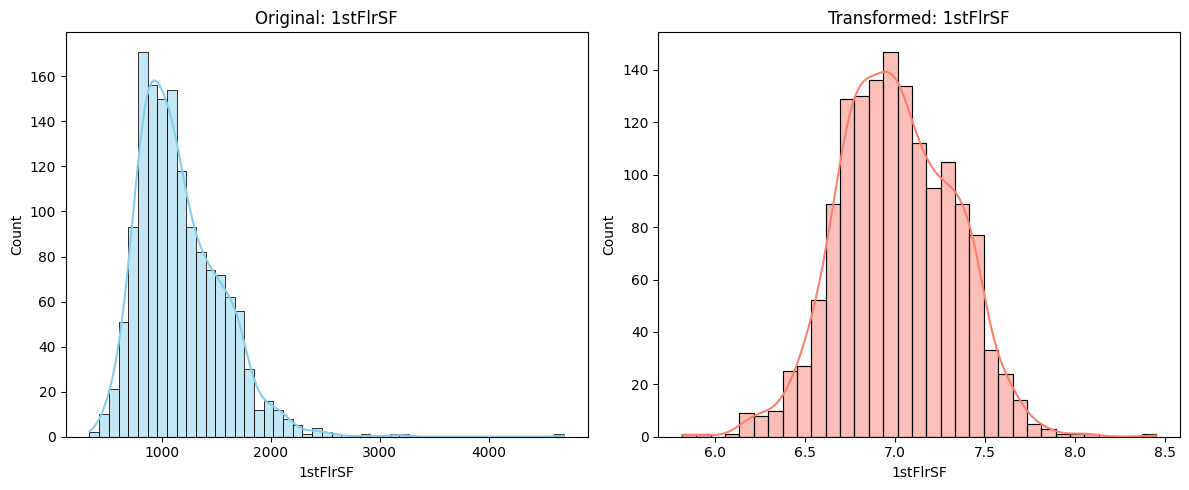

----------------------------------------
Feature: 2ndFlrSF
  Original Skewness: 0.81
  Transformed Skewness: 0.42
----------------------------------------


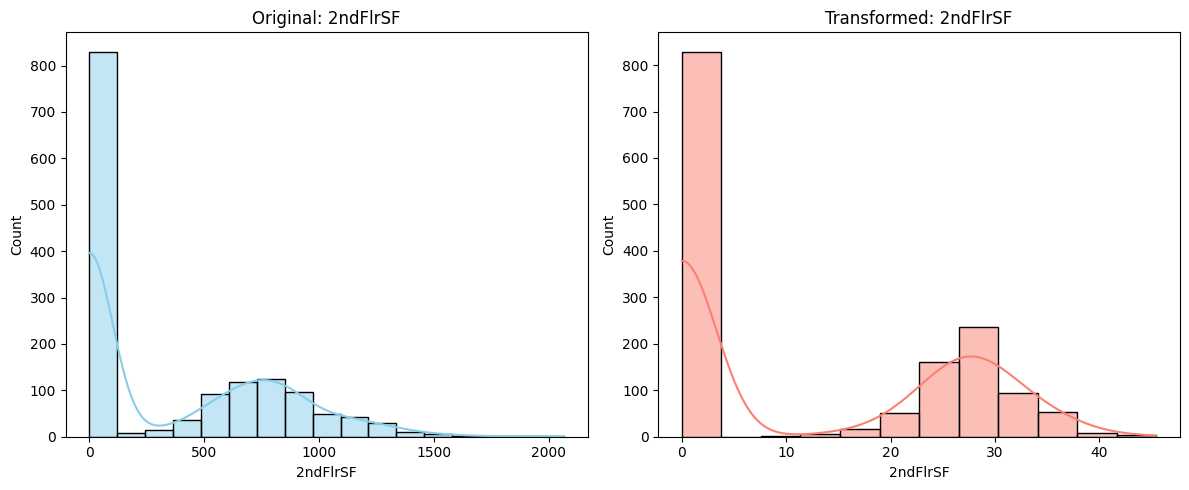

----------------------------------------
Feature: LowQualFinSF
  Original Skewness: 9.00
  Transformed Skewness: 7.37
----------------------------------------


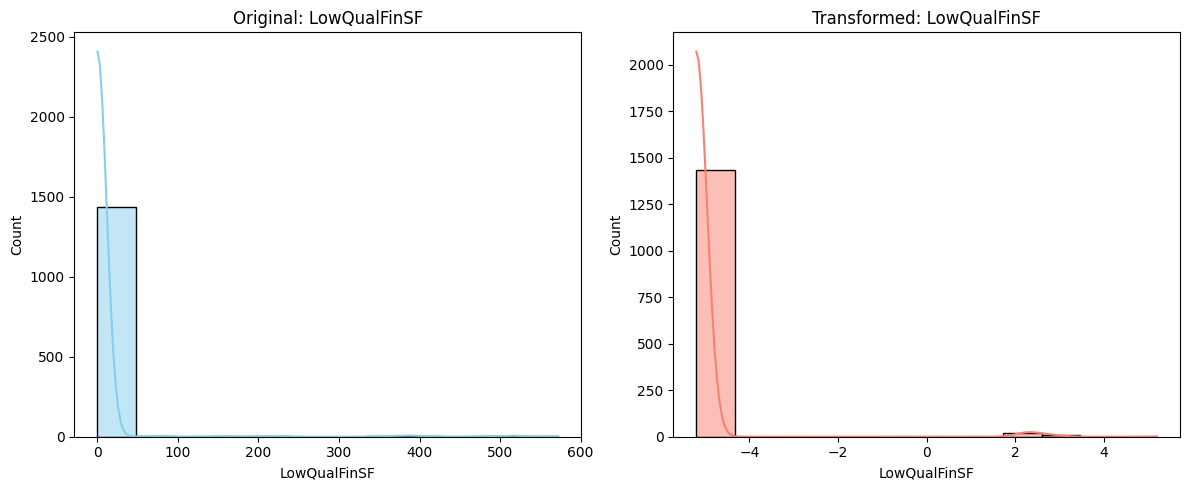

----------------------------------------
Feature: GrLivArea
  Original Skewness: 1.37
  Transformed Skewness: -0.01
----------------------------------------


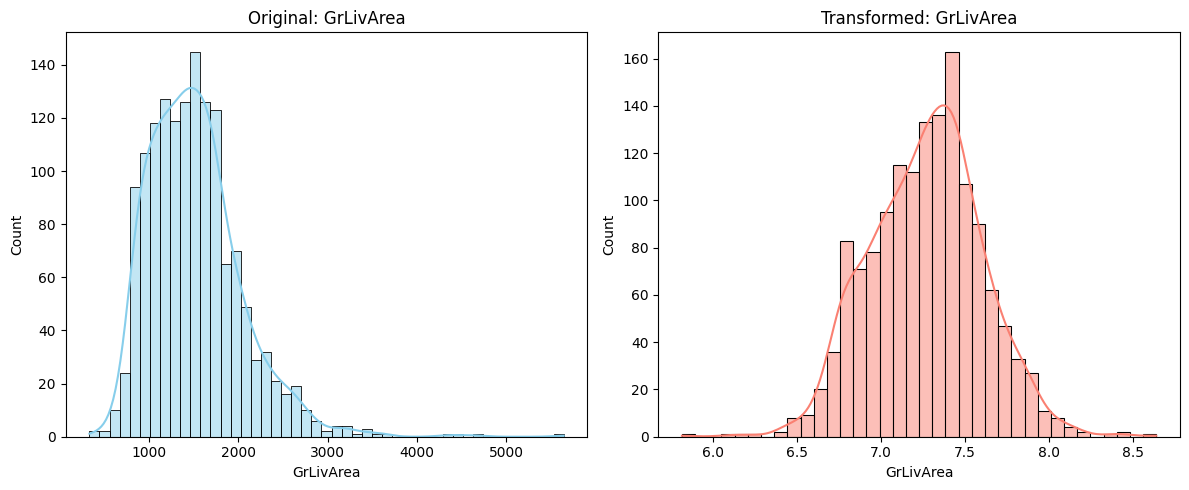

----------------------------------------
Feature: TotRmsAbvGrd
  Original Skewness: 0.68
  Transformed Skewness: 0.25
----------------------------------------


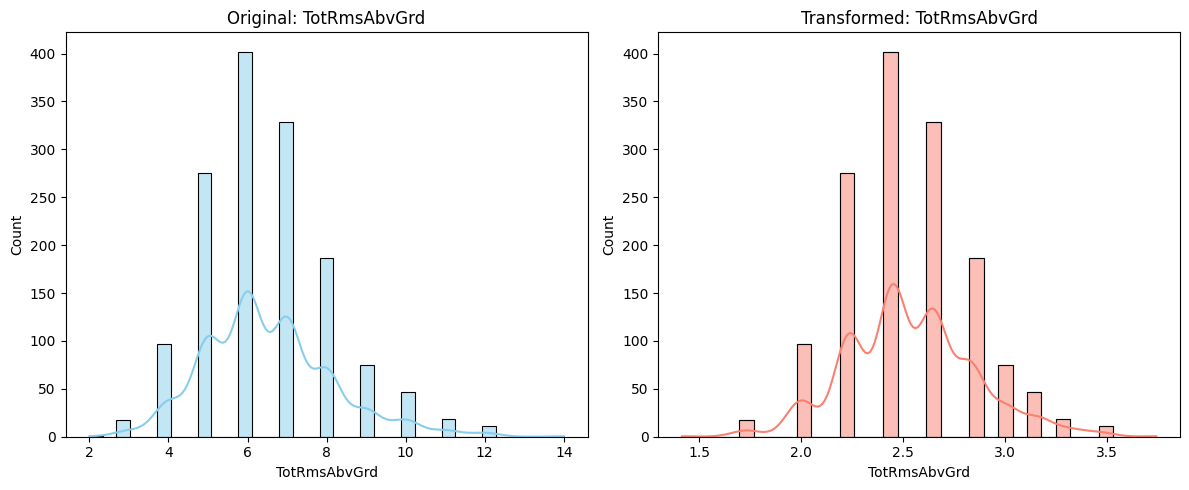

----------------------------------------
Feature: GarageYrBlt
  Original Skewness: -3.87
  Transformed Skewness: -0.02
----------------------------------------


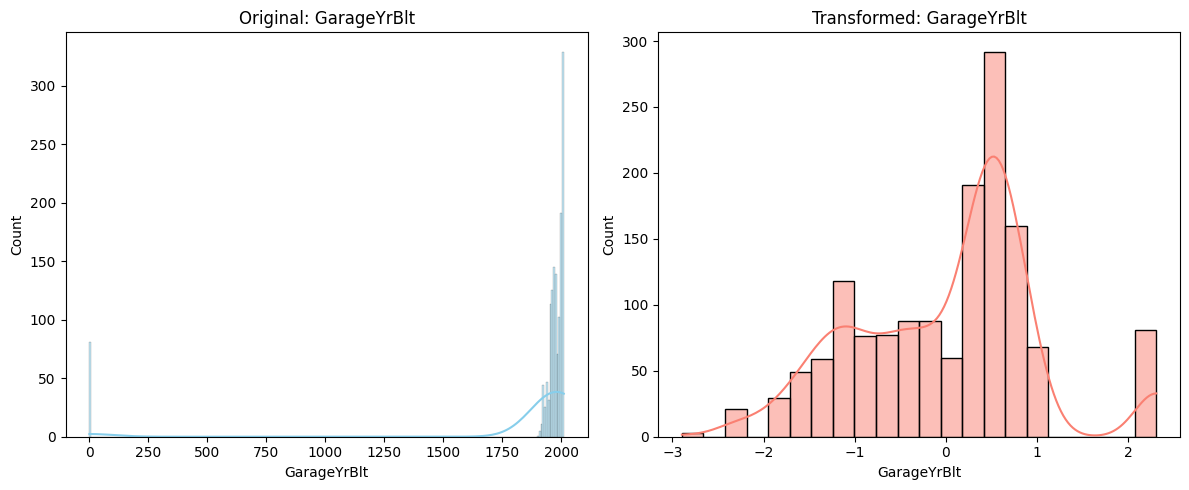

----------------------------------------
Feature: WoodDeckSF
  Original Skewness: 1.54
  Transformed Skewness: 0.15
----------------------------------------


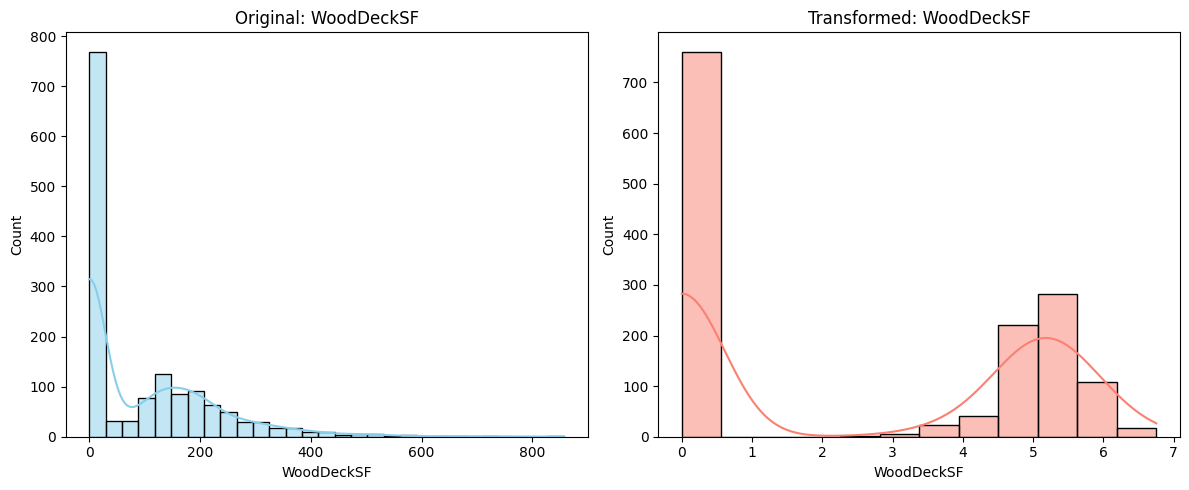

----------------------------------------
Feature: OpenPorchSF
  Original Skewness: 2.36
  Transformed Skewness: -0.01
----------------------------------------


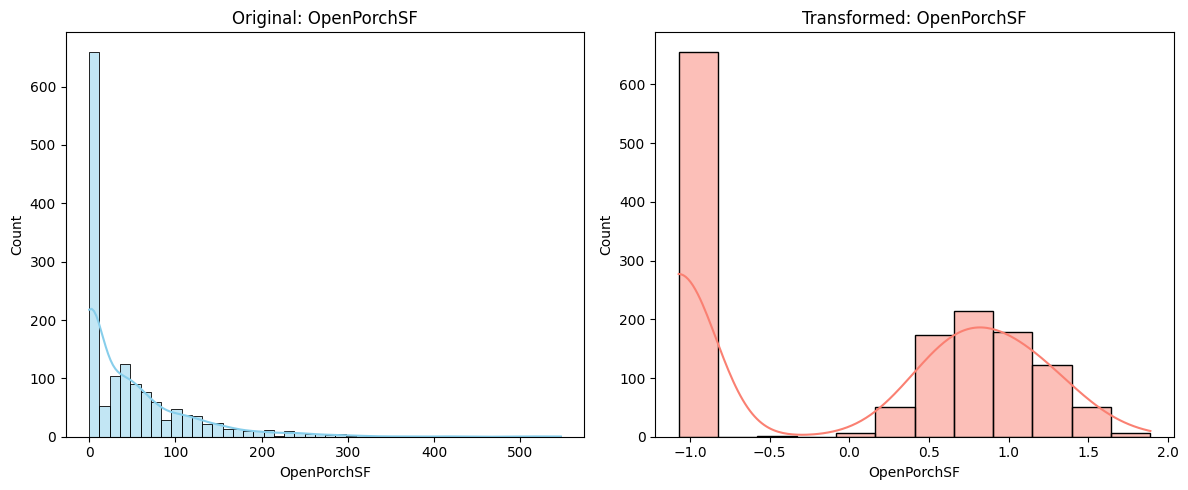

----------------------------------------
Feature: EnclosedPorch
  Original Skewness: 3.09
  Transformed Skewness: 2.05
----------------------------------------


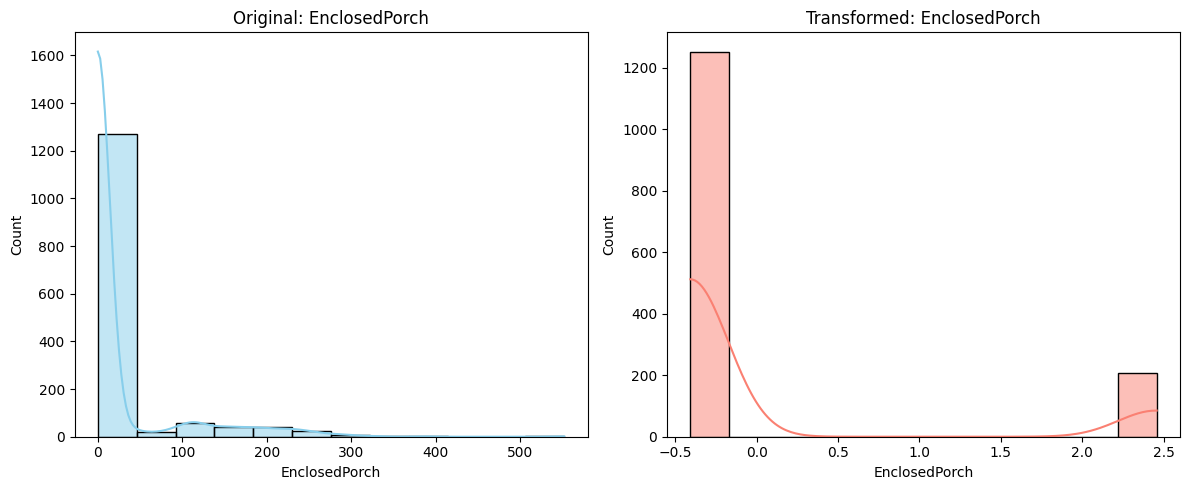

----------------------------------------
Feature: 3SsnPorch
  Original Skewness: 10.29
  Transformed Skewness: 7.69
----------------------------------------


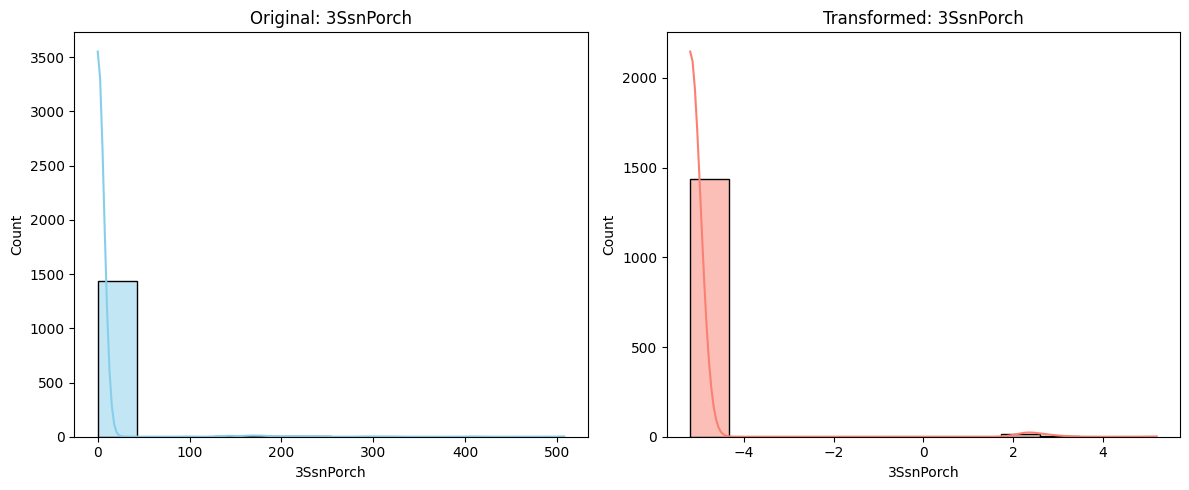

----------------------------------------
Feature: ScreenPorch
  Original Skewness: 4.12
  Transformed Skewness: 3.11
----------------------------------------


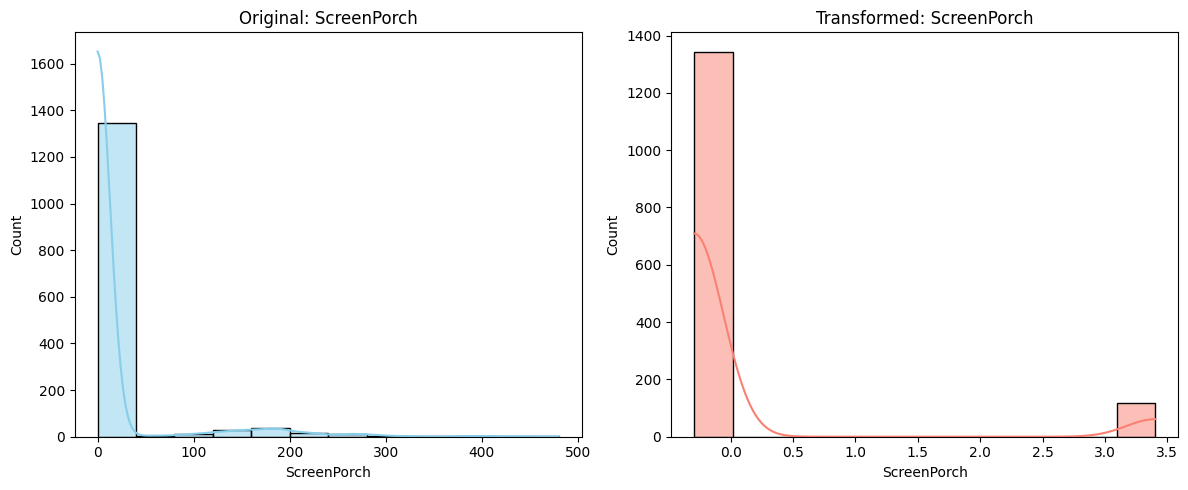

----------------------------------------
Feature: MiscVal
  Original Skewness: 24.45
  Transformed Skewness: 5.06
----------------------------------------


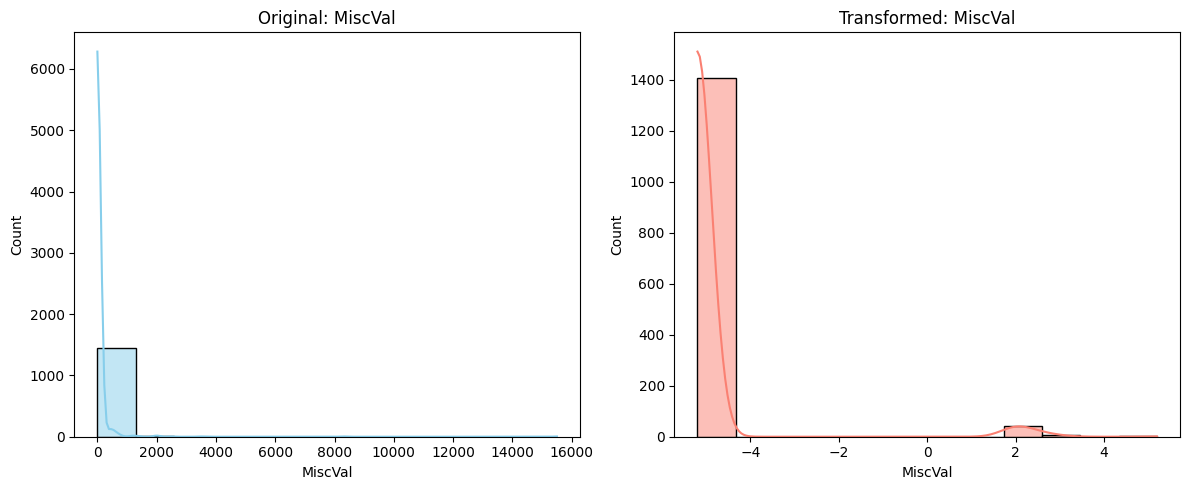

In [108]:
def treat_skewness(df, continuous_features, skew_threshold=0.5, mild_threshold=1.0, moderate_threshold=2.0):
    df = df.copy() 

    # Get skewness values for all continuous features
    skewness = df[continuous_features].apply(skew)

    # Find features where skewness exceeds the threshold
    skewed_features = skewness[abs(skewness) > skew_threshold].index.tolist()
    print(f"Found {len(skewed_features)} skewed continuous features: {skewed_features}")

    # Store details of the transformations (for future reference if needed)
    transformation_details = {}

    for feature in skewed_features:
        feature_skew = skewness[feature]
        original_feature = df[feature].copy()  # Save original values in case we need to revert

        # If the feature is negatively skewed, reflect the data to make it positive
        if feature_skew < 0:
            df[feature] = df[feature].max() + 1 - df[feature]
            feature_skew = abs(feature_skew)  # Treat it as positive for transformation decisions
            print(f"{feature} is negatively skewed. Data reflected.")

        # Choose the right transformation based on how severe the skewness is
        if skew_threshold < feature_skew <= mild_threshold:
            # Mild skewness → Square root transformation
            if df[feature].min() < 0:
                shift_value = abs(df[feature].min()) + 1
                df[feature] = np.sqrt(df[feature] + shift_value)
                transformation_type = f"Square Root (shifted by {shift_value})"
            else:
                df[feature] = np.sqrt(df[feature])
                transformation_type = "Square Root"
        
        elif mild_threshold < feature_skew <= moderate_threshold:
            # Moderate skewness → Log transformation
            if df[feature].min() < 0:
                shift_value = abs(df[feature].min()) + 1
                df[feature] = np.log1p(df[feature] + shift_value)
                transformation_type = f"Log(1 + x) (shifted by {shift_value})"
            else:
                df[feature] = np.log1p(df[feature])
                transformation_type = "Log(1 + x)"
        
        else:
            # Severe skewness → Use advanced transformers
            if feature_skew > 5:
                qt = QuantileTransformer(output_distribution='normal')
                df[feature] = qt.fit_transform(df[[feature]])
                transformation_type = "Quantile Transformation"
                transformation_details[feature] = qt
            else:
                pt = PowerTransformer(method='yeo-johnson')
                df[feature] = pt.fit_transform(df[[feature]])
                transformation_type = "Yeo-Johnson"
                transformation_details[feature] = pt

        # Check if the transformation actually reduced the skewness
        new_skew = skew(df[feature])
        if abs(new_skew) >= abs(feature_skew):
            print(f"{feature} - No improvement, reverting...")
            df[feature] = original_feature
            continue

        print(f"{feature} transformed using {transformation_type}")

    return df, skewed_features, transformation_details


# Apply skewness treatment only to continuous features
treated_df, skewed_features, transformation_details = treat_skewness(df_encoded, continuous_features)

# Compare the original and transformed distributions for each skewed feature
for feature in skewed_features:
    original_skewness = skew(df_encoded[feature])
    transformed_skewness = skew(treated_df[feature])

    print("-" * 40)
    print(f"Feature: {feature}")
    print(f"  Original Skewness: {original_skewness:.2f}")
    print(f"  Transformed Skewness: {transformed_skewness:.2f}")
    print("-" * 40)

    # Visualize the change in distribution
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_encoded[feature], kde=True, color="skyblue")
    plt.title(f"Original: {feature}", fontsize=12)

    plt.subplot(1, 2, 2)
    sns.histplot(treated_df[feature], kde=True, color="salmon")
    plt.title(f"Transformed: {feature}", fontsize=12)

    plt.tight_layout()
    plt.show()

In [112]:
treated_df.to_csv("G:/Shared drives/ML Project/treated_data.csv", index=False)
print("Treated dataset saved successfully.")

Treated dataset saved successfully.
